# Importing Necessary Packages

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from pycaret.regression import *


# Reading necessary datasets

In [407]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Looking at first 5 rows of test and train

In [408]:
test.head()

ID Levy Manufacturer   Model  Prod. year   Category Leather interior  \
0  44020629    -   VOLKSWAGEN    Golf        2012  Hatchback               No   
1  45784798    -      HYUNDAI  Sonata        2012      Sedan              Yes   
2  45800257    -       NISSAN   Tiida        2005      Sedan               No   
3  45797981  975        VOLVO    XC90        2012       Jeep              Yes   
4  45814303    -         OPEL   Astra        1993  Hatchback               No   

  Fuel type Engine volume    Mileage  Cylinders Gear box type Drive wheels  \
0    Diesel     2.0 Turbo       0 km          4        Manual        Front   
1    Petrol           2.4   26000 km          4     Tiptronic        Front   
2    Petrol           1.5  168000 km          4     Automatic        Front   
3    Petrol           3.2  143000 km          6     Automatic          4x4   
4    Petrol           1.6  200000 km          4        Manual        Front   

    Doors             Wheel     Color  Airbags  Price  
0  02-Mar        Left wheel      Grey       10    NaN  
1  04-May        Left wheel      Grey       10    NaN  
2  04-May  Right-hand drive  Sky blue        8    NaN  
3  04-May        Left wheel      Blue       12    NaN  
4  04-May        Left wheel     Black        0    NaN

In [409]:
train.head()

ID  Price  Levy Manufacturer    Model  Prod. year   Category  \
0  45654403  13328  1399        LEXUS   RX 450        2010       Jeep   
1  44731507  16621  1018    CHEVROLET  Equinox        2011       Jeep   
2  45774419   8467     -        HONDA      FIT        2006  Hatchback   
3  45769185   3607   862         FORD   Escape        2011       Jeep   
4  45809263  11726   446        HONDA      FIT        2014  Hatchback   

  Leather interior Fuel type Engine volume    Mileage  Cylinders  \
0              Yes    Hybrid           3.5  186005 km        6.0   
1               No    Petrol             3  192000 km        6.0   
2               No    Petrol           1.3  200000 km        4.0   
3              Yes    Hybrid           2.5  168966 km        4.0   
4              Yes    Petrol           1.3   91901 km        4.0   

  Gear box type Drive wheels   Doors             Wheel   Color  Airbags  
0     Automatic          4x4  04-May        Left wheel  Silver       12  
1     Tiptronic          4x4  04-May        Left wheel   Black        8  
2      Variator        Front  04-May  Right-hand drive   Black        2  
3     Automatic          4x4  04-May        Left wheel   White        0  
4     Automatic        Front  04-May        Left wheel  Silver        4

# Looking for any outliers in numerical columns

In [410]:
train.describe()

ID         Price    Prod. year     Cylinders       Airbags
count  1.923700e+04  1.923700e+04  19237.000000  19237.000000  19237.000000
mean   4.557654e+07  1.855593e+04   2010.912824      4.582991      6.582627
std    9.365914e+05  1.905813e+05      5.668673      1.199933      4.320168
min    2.074688e+07  1.000000e+00   1939.000000      1.000000      0.000000
25%    4.569837e+07  5.331000e+03   2009.000000      4.000000      4.000000
50%    4.577231e+07  1.317200e+04   2012.000000      4.000000      6.000000
75%    4.580204e+07  2.207500e+04   2015.000000      4.000000     12.000000
max    4.581665e+07  2.630750e+07   2020.000000     16.000000     16.000000

# Looking for any null values

In [411]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [412]:
train.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [413]:
train.rename(columns={"Mileage":"Distance_Travelled"}, inplace=True)
test.rename(columns={"Mileage":"Distance_Travelled"}, inplace=True)

# EDA & Feature Engineering

## Checking for unique values in Doors

In [414]:
train["Doors"].unique(), test["Doors"].unique()

(array(['04-May', '02-Mar', '>5'], dtype=object),
 array(['02-Mar', '04-May', '>5'], dtype=object))

**Observation**
As we can see door columns has wrong data, we will map it correctly in next step


## Mapping correct value to the doors as they are not in correct format

In [415]:
doors_map = {'04-May':"4", '02-Mar':"2", '>5':">5"}
train.Doors = train.Doors.map(doors_map)
test.Doors = test.Doors.map(doors_map)

## Looking at Distance_Travelled distplot after removing km from the string

In [416]:


train.Distance_Travelled = train.Distance_Travelled.apply(lambda mil: int(mil.split()[0]))
test.Distance_Travelled = test.Distance_Travelled.apply(lambda mil: int(mil.split()[0]))

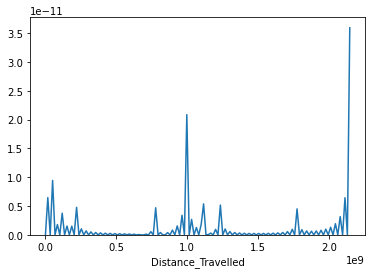

In [417]:
sns.distplot(train["Distance_Travelled"], hist=False)

**Observation**
We see lots of peaks and the Distance_Travelled is not distributted normally

In [418]:
train.Distance_Travelled = np.sqrt(np.log1p(train["Distance_Travelled"]))
test.Distance_Travelled = np.sqrt(np.log1p(test["Distance_Travelled"]))

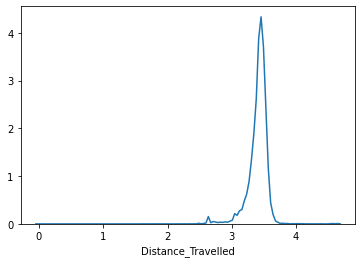

In [419]:
sns.distplot(train["Distance_Travelled"], hist=False)

**Observation**
After applying log transformation the curve looks smooth

In [420]:
train.Distance_Travelled.max()

4.635467894113636

## Converting Distance_Travelled into bins by looking at the ditplot above

In [421]:
Distance_Travelled_labels = ['low km', 'mid km', 'high km']
Distance_Travelled_bins = [-1, 3, 3.7, 30]
train["Distance_Travelled_cat"] = pd.cut(train["Distance_Travelled"], bins=Distance_Travelled_bins, labels=Distance_Travelled_labels)
test["Distance_Travelled_cat"] = pd.cut(test["Distance_Travelled"], bins=Distance_Travelled_bins, labels=Distance_Travelled_labels)

## Dropping ID columns from train and test

In [422]:
train.drop(columns="ID", inplace=True)
test.drop(columns="ID", inplace=True)

## Looking at production year box plot

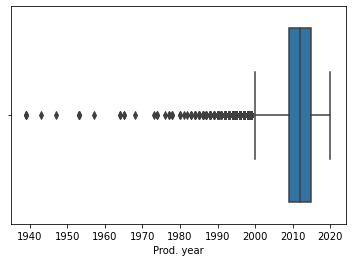

In [423]:
sns.boxplot(train["Prod. year"])

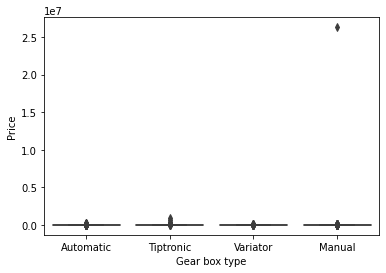

In [424]:
sns.boxplot(x=train["Gear box type"], y=train["Price"])

## Looking at Airbags distplot

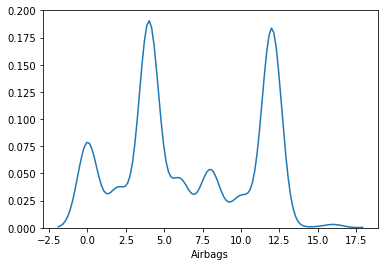

In [425]:
sns.distplot(train["Airbags"], hist=False)

## Creating new column out of Prod Year

In [426]:
train["Prod. year"].max()

2020

### Creating new column as years_old whcih will store age of the vehicle

In [427]:
train["years_old"] = train["Prod. year"].apply(lambda year: 2020-year)
test["years_old"] = test["Prod. year"].apply(lambda year: 2020-year)

### Binning Prod Year based on distplot

In [428]:
car_year_labels = ['old', 'new', 'modern']
car_year_bins = [-1, 1990, 2005, 2025]
train["Prod. year"] = pd.cut(train["Prod. year"], bins=car_year_bins, labels=car_year_labels)
test["Prod. year"] = pd.cut(test["Prod. year"], bins=car_year_bins, labels=car_year_labels)

## Creating new feature as car safety absed on airbags

In [429]:
car_safety_labels = ['no sfatey', 'safety', 'mid safety', 'high safety']
car_safety_bins = [-1, 0, 2, 6, 20]
train["car_safety"] = pd.cut(train["Airbags"], bins=car_safety_bins, labels=car_safety_labels)
test["car_safety"] = pd.cut(test["Airbags"], bins=car_safety_bins, labels=car_safety_labels)

## Looking at Engine Volume Column

In [430]:
train["Engine volume"].unique()

array(['3.5', '3', '1.3', '2.5', '2', '1.8', '2.4', '4', '1.6', '3.3',
       '2.0 Turbo', '2.2 Turbo', '4.7', '1.5', '4.4', '3.0 Turbo',
       '1.4 Turbo', '3.6', '2.3', '1.5 Turbo', '1.6 Turbo', '2.2',
       '2.3 Turbo', '1.4', '5.5', '2.8 Turbo', '3.2', '3.8', '4.6', '1.2',
       '5', '1.7', '2.9', '0.5', '1.8 Turbo', '2.4 Turbo', '3.5 Turbo',
       '1.9', '2.7', '4.8', '5.3', '0.4', '2.8', '3.2 Turbo', '1.1',
       '2.1', '0.7', '5.4', '1.3 Turbo', '3.7', '1', '2.5 Turbo', '2.6',
       '1.9 Turbo', '4.4 Turbo', '4.7 Turbo', '0.8', '0.2 Turbo', '5.7',
       '4.8 Turbo', '4.6 Turbo', '6.7', '6.2', '1.2 Turbo', '3.4',
       '1.7 Turbo', '6.3 Turbo', '2.7 Turbo', '4.3', '4.2', '2.9 Turbo',
       '0', '4.0 Turbo', '20', '3.6 Turbo', '0.3', '3.7 Turbo', '5.9',
       '5.5 Turbo', '0.2', '2.1 Turbo', '5.6', '6', '0.7 Turbo',
       '0.6 Turbo', '6.8', '4.5', '0.6', '7.3', '0.1', '1.0 Turbo', '6.3',
       '4.5 Turbo', '0.8 Turbo', '4.2 Turbo', '3.1', '5.0 Turbo', '6.4',
       '3

### Creating new feature as engine has turbo based on engine volume contains turbo word

In [431]:
train["Engine_has_turbo"] = train["Engine volume"].apply(lambda volume: 1 if "Turbo" in volume else 0)
test["Engine_has_turbo"] = test["Engine volume"].apply(lambda volume: 1 if "Turbo" in volume else 0)

### Cleaning engine volume column to have numerical values only

In [432]:
train["Engine volume"] = train["Engine volume"].apply(lambda volume: float(volume.split()[0]))
test["Engine volume"] = test["Engine volume"].apply(lambda volume: float(volume.split()[0]))

## Replacing - with 0 as - means no Levy was applied on the vehicle

In [433]:
train.Levy.replace("-", 0, inplace=True)
test.Levy.replace("-", 0, inplace=True)

train.Levy = train.Levy.astype("int64")
test.Levy = test.Levy.astype("int64")

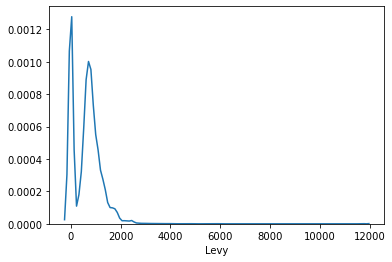

In [434]:
sns.distplot(train["Levy"], hist=False)

**Observation**
Levy is right skewwed. Lets apply some transformation to make it normally distributed

In [435]:
train.Levy = np.sqrt(train.Levy)
test.Levy = np.sqrt(test.Levy)

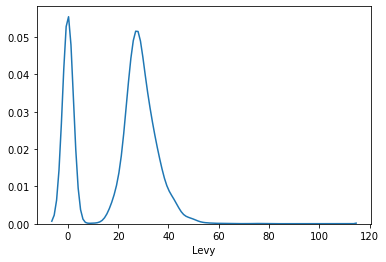

In [436]:
sns.distplot(train["Levy"], hist=False)

### Converting levy into bins based on distplot

In [437]:
levy_labels = ['low levy', 'mid levy', 'high levy']
levy_bins = [-1, 10, 50, 130]
train["levy_cat"] = pd.cut(train["Levy"], bins=levy_bins, labels=levy_labels)
test["levy_cat"] = pd.cut(test["Levy"], bins=levy_bins, labels=levy_labels)

## Looking at target variable

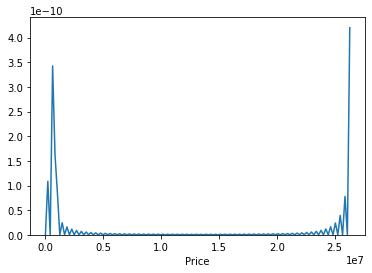

In [438]:
sns.distplot(train["Price"], hist=False)

**Observation**
Target variable is not normally distributed

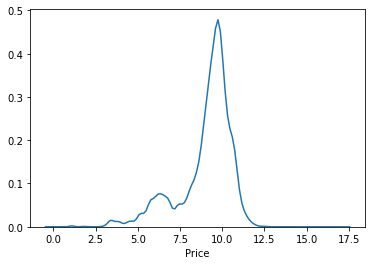

In [439]:
sns.distplot(np.log(train["Price"]), hist=False)

**Observation**
After applying log transformation target variable is somewhat normally distributed

In [440]:
train.Price = np.log(train.Price) # Applying log transformation to target variable


## Looking at correlation matrix heatmap

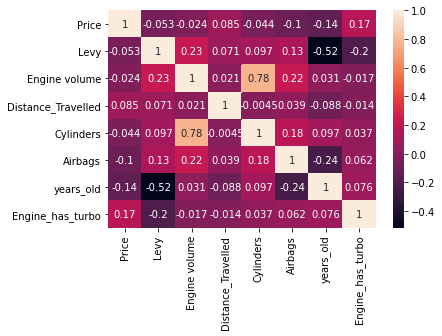

In [441]:
sns.heatmap(train.corr(), annot=True)

**Observation** We don't observe much correlation between any variable

## Creating new fetaure with combination of  engine volume and cylinders

In [442]:
train["vol_cylinder"] = train["Engine volume"] * train["Cylinders"]
test["vol_cylinder"] = test["Engine volume"] * test["Cylinders"]

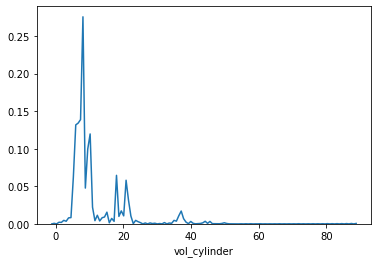

In [443]:
sns.distplot(train["vol_cylinder"], hist=False)

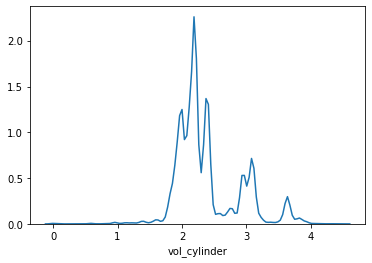

In [444]:
sns.distplot(np.log1p(train["vol_cylinder"]), hist=False)

In [445]:
train["vol_cylinder"] = np.log1p(train["vol_cylinder"])
test["vol_cylinder"] = np.log1p(test["vol_cylinder"])

## Creating a pairplot

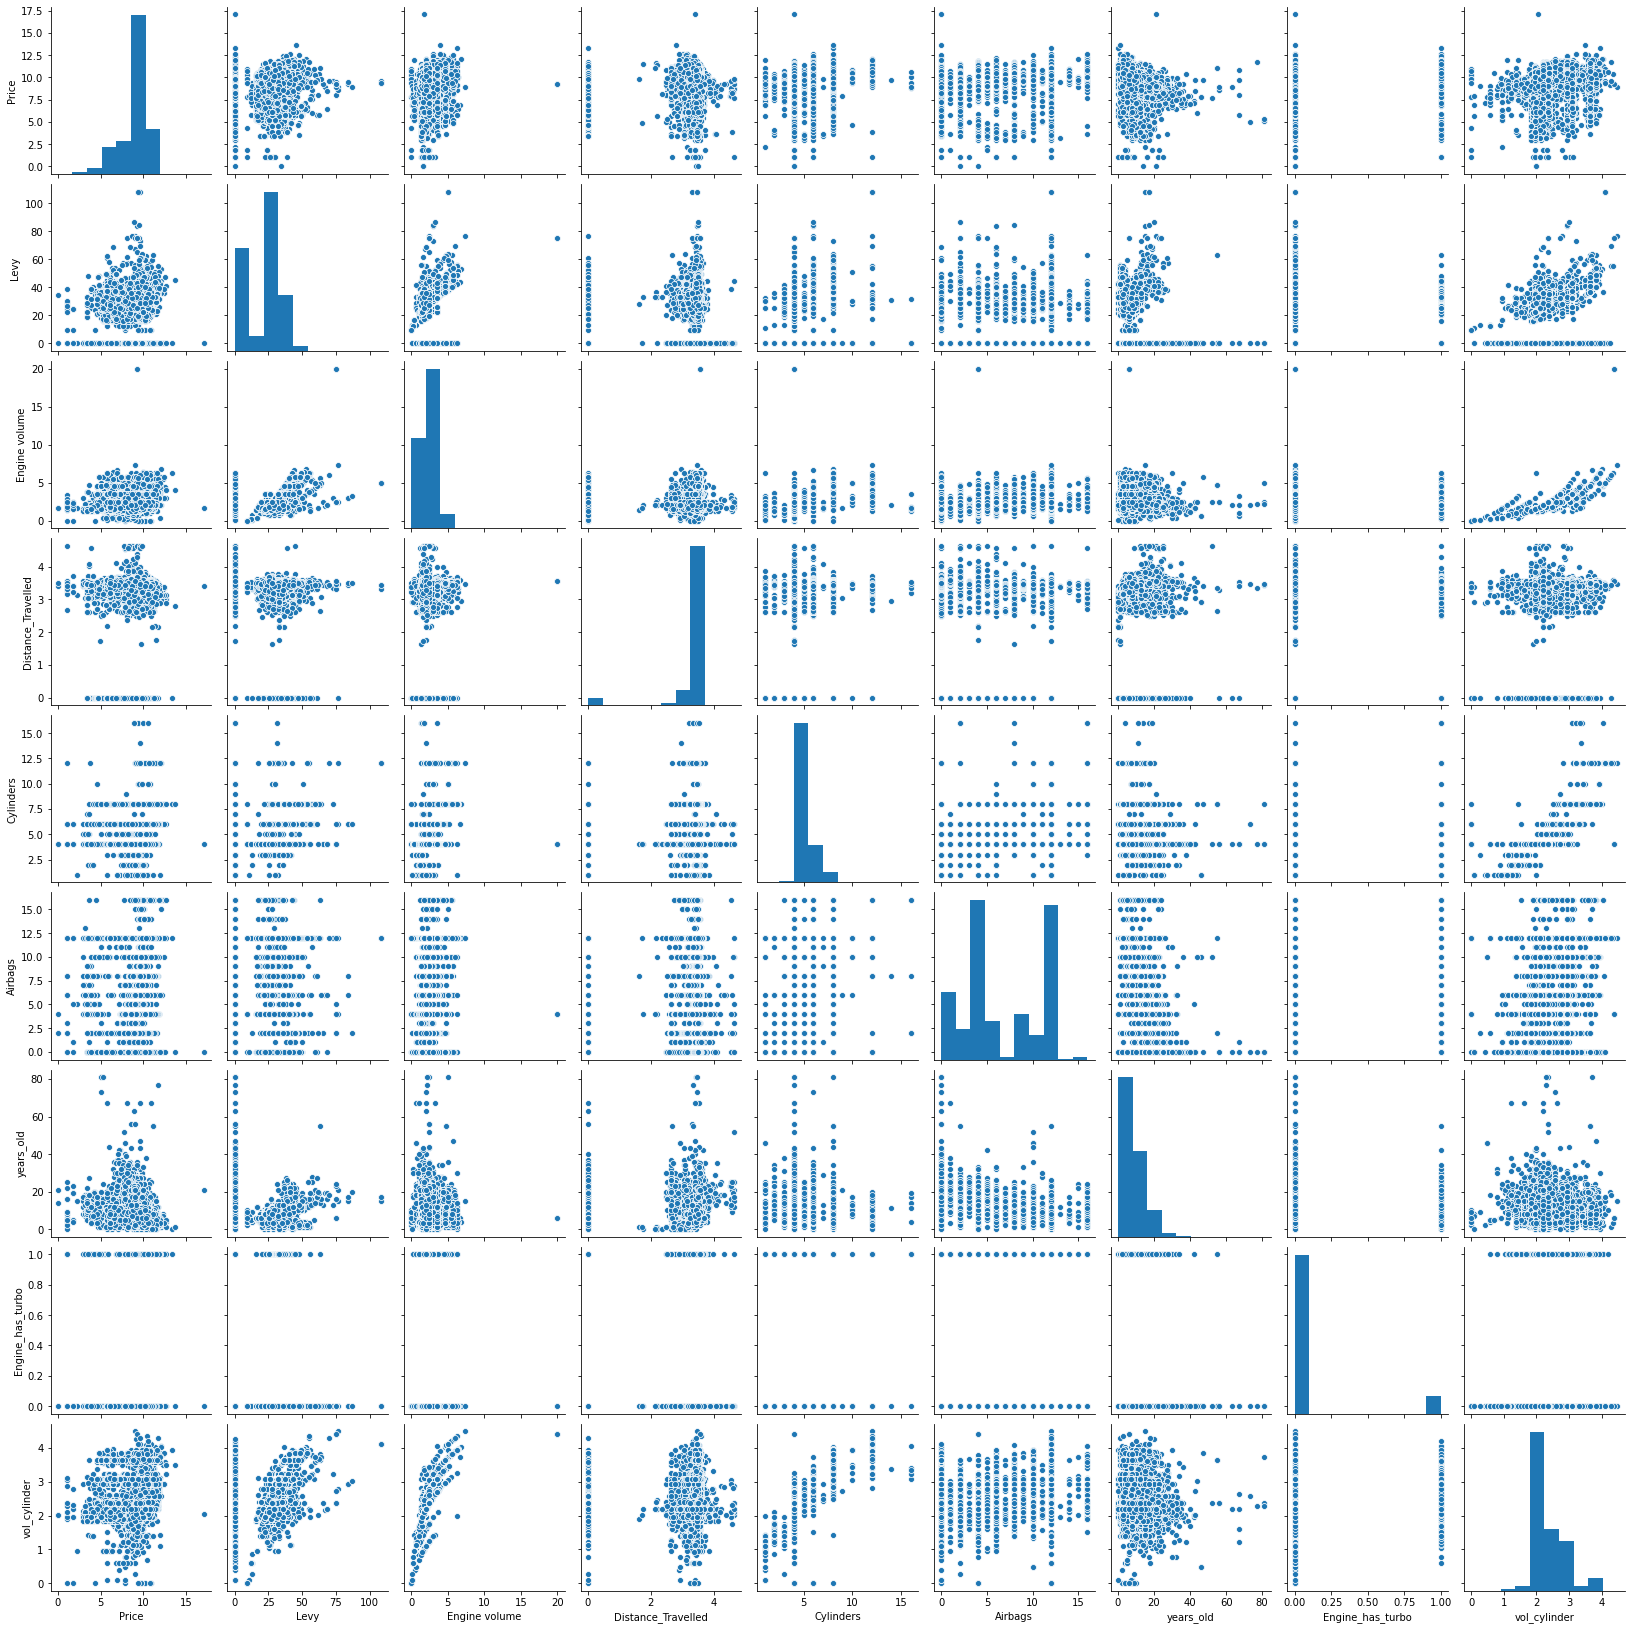

In [446]:
sns.pairplot(train)

## FInally looking at null values are present or not

In [447]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Price                   19237 non-null  float64 
 1   Levy                    19237 non-null  float64 
 2   Manufacturer            19237 non-null  object  
 3   Model                   19237 non-null  object  
 4   Prod. year              19237 non-null  category
 5   Category                19237 non-null  object  
 6   Leather interior        19237 non-null  object  
 7   Fuel type               19237 non-null  object  
 8   Engine volume           19237 non-null  float64 
 9   Distance_Travelled      19237 non-null  float64 
 10  Cylinders               19237 non-null  float64 
 11  Gear box type           19237 non-null  object  
 12  Drive wheels            19237 non-null  object  
 13  Doors                   19237 non-null  object  
 14  Wheel                 

# Building Multiple models

## Using pycaret to compare all regression models at one place to get a quick comparison

In [448]:
exp_reg = setup(train, target="Price")#, ignore_features=['Model', 'Prod. year', 'Category',
#        'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
#        'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
#        'Airbags'])

In [449]:
compare_models()

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=544, verbose=0, warm_start=False)

In [27]:
compare_models()

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=275, verbose=0, warm_start=False)

In [28]:
model = create_model("rf")

In [29]:
predictions = predict_model(model, data = test)

In [33]:
train.head()

Price  Levy Manufacturer    Model Prod. year   Category  \
0  9.497622  1399        LEXUS   RX 450     modern       Jeep   
1  9.718422  1018    CHEVROLET  Equinox     modern       Jeep   
2  9.043932    -1        HONDA      FIT     modern  Hatchback   
3  8.190632   862         FORD   Escape     modern       Jeep   
4  9.369564   446        HONDA      FIT     modern  Hatchback   

  Leather interior Fuel type Engine volume  Mileage  Cylinders Gear box type  \
0              Yes    Hybrid           3.5   186005        6.0     Automatic   
1               No    Petrol             3   192000        6.0     Tiptronic   
2               No    Petrol           1.3   200000        4.0      Variator   
3              Yes    Hybrid           2.5   168966        4.0     Automatic   
4              Yes    Petrol           1.3    91901        4.0     Automatic   

  Drive wheels Doors             Wheel   Color  Airbags  
0          4x4     4        Left wheel  Silver       12  
1          4x4     4        Left wheel   Black        8  
2        Front     4  Right-hand drive   Black        2  
3          4x4     4        Left wheel   White        0  
4        Front     4        Left wheel  Silver        4

In [39]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Price             19237 non-null  float64 
 1   Levy              19237 non-null  int32   
 2   Manufacturer      19237 non-null  object  
 3   Model             19237 non-null  object  
 4   Prod. year        19237 non-null  category
 5   Category          19237 non-null  object  
 6   Leather interior  19237 non-null  object  
 7   Fuel type         19237 non-null  object  
 8   Engine volume     19237 non-null  object  
 9   Mileage           19237 non-null  int64   
 10  Cylinders         19237 non-null  float64 
 11  Gear box type     19237 non-null  object  
 12  Drive wheels      19237 non-null  object  
 13  Doors             19237 non-null  object  
 14  Wheel             19237 non-null  object  
 15  Color             19237 non-null  object  
 16  Airbags           1923

In [30]:
predictions = np.exp(predictions["Label"])

In [31]:
submission = pd.DataFrame()
submission["Price"] = predictions
# submission["Price"] = submission["Price"].apply(lambda price: int(round(price,0)))
submission.to_csv("my_submission_file.csv", index=False)

In [32]:
submission

Price
0     12975.272624
1      7370.303900
2      8235.799690
3      1594.835602
4      3715.811539
...            ...
8240   7433.446750
8241  20619.110079
8242    496.262411
8243  41468.301026
8244    576.905227

[8245 rows x 1 columns]

In [29]:
tuned_model = tune_model(model)

In [71]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

y = train.pop("Price")
X = train

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

rf = RandomForestRegressor(random_state = 42)
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'criterion': 'mse'}

In [72]:

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 116 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    4.6s finished


ValueError: ignored

In [34]:
train.head()

Price       Levy   Manufacturer    Model Prod. year   Category  \
0       9.497622  37.403208          LEXUS   RX 450     modern       Jeep   
1       9.718422  31.906112      CHEVROLET  Equinox     modern       Jeep   
2       9.043932   0.000000          HONDA      FIT     modern  Hatchback   
3       8.190632  29.359837           FORD   Escape     modern       Jeep   
4       9.369564  21.118712          HONDA      FIT     modern  Hatchback   
...          ...        ...            ...      ...        ...        ...   
19232   9.043932   0.000000  MERCEDES-BENZ  CLK 200        new      Coupe   
19233   9.660205  28.827071        HYUNDAI   Sonata     modern      Sedan   
19234  10.169997  28.913665        HYUNDAI   Tucson     modern       Jeep   
19235   8.581294  35.888717      CHEVROLET  Captiva     modern       Jeep   
19236   6.152733  27.440845        HYUNDAI   Sonata     modern      Sedan   

      Leather interior Fuel type  Engine volume   Mileage  Cylinders  \
0                  Yes    Hybrid            3.5  3.483322        6.0   
1                   No    Petrol            3.0  3.487872        6.0   
2                   No    Petrol            1.3  3.493719        4.0   
3                  Yes    Hybrid            2.5  3.469503        4.0   
4                  Yes    Petrol            1.3  3.380602        4.0   
...                ...       ...            ...       ...        ...   
19232              Yes       CNG            2.0  3.551273        4.0   
19233              Yes    Petrol            2.4  3.463074        4.0   
19234              Yes    Diesel            2.0  3.415331        4.0   
19235              Yes    Diesel            2.0  3.293118        4.0   
19236              Yes    Hybrid            2.4  3.484028        4.0   

      Gear box type Drive wheels Doors             Wheel   Color  Airbags  \
0         Automatic          4x4     4        Left wheel  Silver       12   
1         Tiptronic          4x4     4        Left wheel   Black        8   
2          Variator        Front     4  Right-hand drive   Black        2   
3         Automatic          4x4     4        Left wheel   White        0   
4         Automatic        Front     4        Left wheel  Silver        4   
...             ...          ...   ...               ...     ...      ...   
19232        Manual         Rear     2        Left wheel  Silver        5   
19233     Tiptronic        Front     4        Left wheel     Red        8   
19234     Automatic        Front     4        Left wheel    Grey        4   
19235     Automatic        Front     4        Left wheel   Black        4   
19236     Automatic        Front     4        Left wheel   White       12   

      mileage_cat  years_old   car_safety  Engine_has_turbo  levy_cat  \
0          mid km         10  high safety                 0  mid levy   
1          mid km          9  high safety                 0  mid levy   
2          mid km         14       safety                 0  low levy   
3          mid km          9    no sfatey                 0  mid levy   
4          mid km          6   mid safety                 0  mid levy   
...           ...        ...          ...               ...       ...   
19232      mid km         21   mid safety                 1  low levy   
19233      mid km          9  high safety                 0  mid levy   
19234      mid km         10   mid safety                 0  mid levy   
19235      mid km         13   mid safety                 0  mid levy   
19236      mid km          8  high safety                 0  mid levy   

       vol_cylinder  
0              21.0  
1              18.0  
2               5.2  
3              10.0  
4               5.2  
...             ...  
19232           8.0  
19233           9.6  
19234           8.0  
19235           8.0  
19236           9.6  

[19237 rows x 23 columns]

In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Price             19237 non-null  float64 
 1   Levy              19237 non-null  float64 
 2   Manufacturer      19237 non-null  object  
 3   Model             19237 non-null  object  
 4   Prod. year        19237 non-null  category
 5   Category          19237 non-null  object  
 6   Leather interior  19237 non-null  object  
 7   Fuel type         19237 non-null  object  
 8   Engine volume     19237 non-null  float64 
 9   Mileage           18516 non-null  float64 
 10  Cylinders         19237 non-null  float64 
 11  Gear box type     19237 non-null  object  
 12  Drive wheels      19237 non-null  object  
 13  Doors             19237 non-null  object  
 14  Wheel             19237 non-null  object  
 15  Color             19237 non-null  object  
 16  Airbags           1923

In [42]:
test.pop("Price")

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
8240   NaN
8241   NaN
8242   NaN
8243   NaN
8244   NaN
Name: Price, Length: 8245, dtype: float64

In [48]:
train.head()

Levy Manufacturer Prod. year   Category Leather interior Fuel type  \
0  37.403208        LEXUS     modern       Jeep              Yes    Hybrid   
1  31.906112    CHEVROLET     modern       Jeep               No    Petrol   
2   0.000000        HONDA     modern  Hatchback               No    Petrol   
3  29.359837         FORD     modern       Jeep              Yes    Hybrid   
4  21.118712        HONDA     modern  Hatchback              Yes    Petrol   

   Engine volume   Mileage  Cylinders Gear box type  ... Doors  \
0            3.5  3.483322        6.0     Automatic  ...     4   
1            3.0  3.487872        6.0     Tiptronic  ...     4   
2            1.3  3.493719        4.0      Variator  ...     4   
3            2.5  3.469503        4.0     Automatic  ...     4   
4            1.3  3.380602        4.0     Automatic  ...     4   

              Wheel   Color Airbags  mileage_cat years_old   car_safety  \
0        Left wheel  Silver      12       mid km        10  high safety   
1        Left wheel   Black       8       mid km         9  high safety   
2  Right-hand drive   Black       2       mid km        14       safety   
3        Left wheel   White       0       mid km         9    no sfatey   
4        Left wheel  Silver       4       mid km         6   mid safety   

  Engine_has_turbo  levy_cat vol_cylinder  
0                0  mid levy         21.0  
1                0  mid levy         18.0  
2                0  low levy          5.2  
3                0  mid levy         10.0  
4                0  mid levy          5.2  

[5 rows x 21 columns]

In [37]:
train.drop("Model", inplace=True, axis=1)
test.drop("Model", inplace=True, axis=1)
train.drop("Manufacturer", inplace=True, axis=1)
test.drop("Manufacturer", inplace=True, axis=1)

In [38]:
cat_cols = train.select_dtypes(include=["object", "category"]).columns.tolist()
num_cols = train.select_dtypes(exclude=["object", "category"]).columns.tolist()
num_cols.remove("Price")

In [39]:
for item in cat_cols:
    print(item, train[item].unique())

Prod. year [modern, new, old]
Categories (3, object): [old < new < modern]
Category ['Jeep' 'Hatchback' 'Sedan' 'Microbus' 'Goods wagon' 'Universal' 'Coupe'
 'Minivan' 'Cabriolet' 'Limousine' 'Pickup']
Leather interior ['Yes' 'No']
Fuel type ['Hybrid' 'Petrol' 'Diesel' 'CNG' 'Plug-in Hybrid' 'LPG' 'Hydrogen']
Gear box type ['Automatic' 'Tiptronic' 'Variator' 'Manual']
Drive wheels ['4x4' 'Front' 'Rear']
Doors ['4' '2' '>5']
Wheel ['Left wheel' 'Right-hand drive']
Color ['Silver' 'Black' 'White' 'Grey' 'Blue' 'Green' 'Red' 'Sky blue' 'Orange'
 'Yellow' 'Brown' 'Golden' 'Beige' 'Carnelian red' 'Purple' 'Pink']
mileage_cat [mid km, low km, high km]
Categories (3, object): [low km < mid km < high km]
car_safety [high safety, safety, no sfatey, mid safety]
Categories (4, object): [no sfatey < safety < mid safety < high safety]
levy_cat [mid levy, low levy, high levy]
Categories (3, object): [low levy < mid levy < high levy]


In [40]:
for_label_enc = ['Gear box type', 'levy_cat', 'car_safety', 'Prod. year', 'mileage_cat']
leather_map = {'yes':1, 'no':0}
wheel = {'left wheel':1, 'right-hand drive':0}
dummy = ['Doors','Category', 'Fuel type', 'Drive wheels', 'Color']

In [41]:
train[cat_cols] = train[cat_cols].apply(lambda x: x.str.lower())
test[cat_cols] = test[cat_cols].apply(lambda x: x.str.lower())

In [42]:
train_copy = train.copy()
test_copy = test.copy()

In [43]:
train['Leather interior'] = train['Leather interior'].map(leather_map)
test['Leather interior'] = test['Leather interior'].map(leather_map)

In [44]:
train['Wheel'] = train['Wheel'].map(wheel)
test['Wheel'] = test['Wheel'].map(wheel)

In [45]:
price = train["Price"][train['Fuel type']=="hydrogen"]

In [46]:
from sklearn.model_selection import train_test_split

y = train.pop("Price")
test.pop("Price")
xtrain, xtest , ytrain, ytest = train_test_split(train, y, test_size=0.2, random_state=42, shuffle=True)


In [47]:
price

12900    9.922604
Name: Price, dtype: float64

In [48]:
ytest = ytest.append(price)

In [49]:
extra_row = xtrain[xtrain['Fuel type']=="hydrogen"]

In [50]:
extra_row

Levy Prod. year Category  Leather interior Fuel type  Engine volume  \
12900   0.0     modern    sedan                 1  hydrogen            2.4   

        Mileage  Cylinders Gear box type Drive wheels Doors  Wheel Color  \
12900  3.415879        6.0     tiptronic        front     4      1  grey   

       Airbags mileage_cat  years_old   car_safety  Engine_has_turbo  \
12900        8      mid km          8  high safety                 0   

       levy_cat  vol_cylinder  
12900  low levy          14.4

In [51]:
xtest = xtest.append(extra_row)

In [52]:
xtest.tail()

Levy Prod. year  Category  Leather interior Fuel type  \
17893   0.000000        new  microbus                 0    diesel   
5339   49.091751     modern     sedan                 1    petrol   
11859  26.210685     modern     sedan                 1    petrol   
9276   29.849623     modern     sedan                 1       lpg   
12900   0.000000     modern     sedan                 1  hydrogen   

       Engine volume   Mileage  Cylinders Gear box type Drive wheels Doors  \
17893            2.4  3.525510        4.0        manual         rear     4   
5339             6.2  3.538884        8.0     automatic         rear     4   
11859            1.6  3.393664        4.0     automatic        front     4   
9276             2.0  3.561350        4.0     automatic        front     4   
12900            2.4  3.415879        6.0     tiptronic        front     4   

       Wheel   Color  Airbags mileage_cat  years_old   car_safety  \
17893      1   white        2      mid km         17       safety   
5339       1   white       12      mid km         10  high safety   
11859      1   white        4      mid km         10   mid safety   
9276       1  silver        4      mid km          4   mid safety   
12900      1    grey        8      mid km          8  high safety   

       Engine_has_turbo  levy_cat  vol_cylinder  
17893                 1  low levy           9.6  
5339                  0  mid levy          49.6  
11859                 0  mid levy           6.4  
9276                  0  mid levy           8.0  
12900                 0  low levy          14.4

In [53]:
ytest.tail()

17893    9.660269
5339     5.752573
11859    9.551800
9276     9.660269
12900    9.922604
Name: Price, dtype: float64

In [54]:
xtrain.shape, xtest.shape, test.shape

((15389, 20), (3849, 20), (8245, 20))

In [55]:
xtrain.head()

Levy Prod. year Category  Leather interior Fuel type  \
7808   27.910571     modern    sedan                 1    hybrid   
16766  35.805028     modern     jeep                 1    diesel   
7285   37.403208     modern    sedan                 1    diesel   
15712  25.337719     modern     jeep                 1    diesel   
16562   0.000000        new     jeep                 1       lpg   

       Engine volume   Mileage  Cylinders Gear box type Drive wheels Doors  \
7808             2.5  3.510858        4.0     automatic        front     4   
16766            2.0  3.352776        4.0     automatic        front     4   
7285             3.5  3.486016        6.0     automatic          4x4     4   
15712            2.0  3.506374        4.0     automatic        front     4   
16562            3.0  3.182243        6.0     tiptronic          4x4     4   

       Wheel   Color  Airbags mileage_cat  years_old   car_safety  \
7808       1   white       12      mid km          7  high safety   
16766      1  silver        4      mid km         13   mid safety   
7285       1   black       12      mid km         10  high safety   
15712      1    grey        4      mid km          8   mid safety   
16562      1  silver        6      mid km         20   mid safety   

       Engine_has_turbo  levy_cat  vol_cylinder  
7808                  0  mid levy          10.0  
16766                 0  mid levy           8.0  
7285                  0  mid levy          21.0  
15712                 0  mid levy           8.0  
16562                 0  low levy          18.0

In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder

countVect = CountVectorizer(lowercase=False, binary=True)
scaler = StandardScaler()


In [57]:
for label in for_label_enc:
    le = LabelEncoder().fit(xtrain[label].unique().tolist())
    xtrain[label] = le.transform(xtrain[label])
    xtest[label] = le.transform(xtest[label])
    test[label] = le.transform(test[label])

In [58]:
xtrain[num_cols] = scaler.fit_transform(xtrain[num_cols])
xtest[num_cols] = scaler.transform(xtest[num_cols])
test[num_cols] = scaler.transform(test[num_cols])


In [59]:
xtrain = pd.get_dummies(xtrain, columns=dummy)
xtest = pd.get_dummies(xtest, columns=dummy)
test = pd.get_dummies(test, columns=dummy)

In [60]:
xtest.head()

Levy  Prod. year  Leather interior  Engine volume   Mileage  \
736   -0.307503           0                 0      -1.031890  0.082343   
8674  -1.418094           1                 1       0.672641 -0.639219   
5971  -1.418094           1                 0      -0.577348  0.342532   
1957   0.326341           0                 1      -0.350077  0.240784   
11075  0.571227           0                 1      -0.804619  0.026252   

       Cylinders  Gear box type  Wheel   Airbags  mileage_cat  years_old  \
736    -0.485097              0      1  0.792099            2  -0.542109   
8674    1.188704              1      1 -1.056949            1   2.473729   
5971    2.862505              1      1 -1.056949            2   2.651132   
1957   -0.485097              0      1 -0.594687            2  -0.542109   
11075  -0.485097              0      1 -0.594687            2  -1.074316   

       car_safety  Engine_has_turbo  levy_cat  vol_cylinder  Doors_2  Doors_4  \
736             0         -0.333586         2     -0.724589        0        1   
8674            3          2.997728         1      0.753473        1        0   
5971            3         -0.333586         1      0.377695        0        1   
1957            1         -0.333586         2     -0.423966        0        1   
11075           1         -0.333586         2     -0.624381        0        1   

       Doors_>5  Category_cabriolet  Category_coupe  Category_goods wagon  \
736           0                   0               0                     0   
8674          0                   0               0                     0   
5971          0                   0               0                     0   
1957          0                   0               0                     0   
11075         0                   0               0                     0   

       Category_hatchback  Category_jeep  Category_limousine  \
736                     1              0                   0   
8674                    0              0                   0   
5971                    0              0                   0   
1957                    0              1                   0   
11075                   0              1                   0   

       Category_microbus  Category_minivan  Category_pickup  Category_sedan  \
736                    0                 0                0               0   
8674                   1                 0                0               0   
5971                   0                 0                0               1   
1957                   0                 0                0               0   
11075                  0                 0                0               0   

       Category_universal  Fuel type_cng  Fuel type_diesel  Fuel type_hybrid  \
736                     0              0                 0                 0   
8674                    0              0                 1                 0   
5971                    0              0                 0                 0   
1957                    0              0                 1                 0   
11075                   0              0                 0                 0   

       Fuel type_hydrogen  Fuel type_lpg  Fuel type_petrol  \
736                     0              0                 0   
8674                    0              0                 0   
5971                    0              0                 1   
1957                    0              0                 0   
11075                   0              0                 1   

       Fuel type_plug-in hybrid  Drive wheels_4x4  Drive wheels_front  \
736                           1                 0                   1   
8674                          0                 0                   0   
5971                          0                 0                   0   
1957                          0                 0                   1   
11075                         0                 0                   1   

      

In [190]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
import keras

In [62]:
len(xtest.columns)

55

In [223]:
#create model
model = Sequential()

#get number of columns in training data
n_cols = xtrain.shape[1]

#add model layers
model.add(Dense(580, activation='relu',kernel_initializer='he_uniform', input_shape=(n_cols,)))

model.add(Dense(256, activation='relu'))
# model.add(Dense(120, activation='relu'))
# model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.3))
# model.add(Dense(60, activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.1))
model.add(Dense(20, activation='relu'))
model.add(Dense(1))

In [224]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss='mean_squared_error')

In [225]:
model.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_118 (Dense)            (None, 580)               32480     
_________________________________________________________________
dense_119 (Dense)            (None, 256)               148736    
_________________________________________________________________
dense_120 (Dense)            (None, 128)               32896     
_________________________________________________________________
dense_121 (Dense)            (None, 20)                2580      
_________________________________________________________________
dense_122 (Dense)            (None, 1)                 21        
Total params: 216,713
Trainable params: 216,713
Non-trainable params: 0
_________________________________________________________________


In [226]:
xtrain.shape, ytrain.shape, xtest.shape, ytest.shape

((15389, 55), (15389,), (3849, 55), (3849,))

In [227]:
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
#set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=3)
save = keras.callbacks.ModelCheckpoint(
    filepath="./",
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)
reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=7, verbose=1, min_delta=1e-4, mode='min')

#train model
# model.fit(xtrain, ytrain, epochs=30, callbacks=[early_stopping_monitor], verbose=1, validation_data=(xtest, ytest))
model.fit(xtrain, ytrain,batch_size=128, epochs=100, callbacks=[save,reduce_lr_loss,early_stopping_monitor], validation_data=(xtest, ytest))

Epoch 1/100
121/121 [==============================] - 1s 8ms/step - loss: 4.0965 - val_loss: 1.5915
Epoch 2/100
121/121 [==============================] - 1s 7ms/step - loss: 1.5616 - val_loss: 1.4118
Epoch 3/100
121/121 [==============================] - 1s 5ms/step - loss: 1.4772 - val_loss: 1.8152
Epoch 4/100
121/121 [==============================] - 1s 4ms/step - loss: 1.4280 - val_loss: 1.4557
Epoch 5/100
121/121 [==============================] - 1s 6ms/step - loss: 1.3994 - val_loss: 1.3570
Epoch 6/100
121/121 [==============================] - 1s 5ms/step - loss: 1.3942 - val_loss: 1.4294
Epoch 7/100
121/121 [==============================] - 1s 7ms/step - loss: 1.3222 - val_loss: 1.5326
Epoch 8/100
121/121 [==============================] - 1s 5ms/step - loss: 1.3021 - val_loss: 1.6711


In [41]:
from sklearn.model_selection import train_test_split

y_copy = train_copy.pop("Price")
test_copy.pop("Price")
xtrain_lg, xtest_lg , ytrain_lg, ytest_lg = train_test_split(train_copy, y_copy, test_size=0.2, random_state=42, shuffle=True)


In [252]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
lgb_model = LGBMRegressor(subsample=0.9)

params = {'num_leaves': sp_randint(6, 100), 
          'num_iterations': sp_randint(10, 10000),
             'min_child_samples': sp_randint(10, 5000), 
             'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4,  1e5, 1e6, 1e7, 1e8],
             'subsample': sp_uniform(loc=0.2, scale=0.8), 
             'colsample_bytree': sp_uniform(loc=0.1, scale=0.6),
             'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100],
          "eval_set" : [(xtest,ytest)],
        'eval_names': ['valid'],
#           'categorical_feature': 'auto'
         }
lgb_random = RandomizedSearchCV(lgb_model, param_distributions=params, n_iter=10, cv=5, random_state=42, 
                                scoring='neg_root_mean_squared_error', verbose=10, return_train_score=True)
lgb_random = lgb_random.fit(xtrain, ytrain)

best_params = lgb_random.best_params_
print(best_params)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] colsample_bytree=0.3247240713084175, eval_names=valid, eval_set=(           Levy  Prod. year  Leather interior  Engine volume   Mileage  \
736   -0.307503           0                 0      -1.031890  0.082343   
8674  -1.418094           1                 1       0.672641 -0.639219   
5971  -1.418094           1                 0      -0.577348  0.342532   
1957   0.326341           0                 1      -0.350077  0.240784   
11075  0.571227           0                 1      -0.804619  0.026252   
...         ...         ...               ...            ...       ...   
17893 -1.418094           1                 0       0.104464  0.377249   
5339   1.969667           0                 1       4.422611  0.397318   
11859  0.390673           0                 1      -0.804619  0.179399   
9276   0.641792           0                 1      -0.350077  0.431032   
12900 -1.418094           0                 1       0.1

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LightGBM] [Warning] 9276 is set=, 9276= will be ignored. Current value: 9276=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 1 is set=, 1= will be ignored. Current value: 1=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 12900 is set=, 12900= will be ignored. Current value: 12900=
[LightGBM] [Warning] 1 is set=, 1= will be ignored. Current value: 1=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] Fuel is set=, Fuel= will be ignored. Current value: Fuel=
[LightGBM] [Warning] Drive is set=, Drive= will be ignored. Current value: Drive=
[LightGBM] [Warning] \ is set=, \= will be ignored. Current value: \=
[LightGBM] [Warning] 736 is set=, 736= will be ignored. Current value: 736=
[LightGBM] [Warning] 1 is set=, 1= will be ignored. Current value: 1=
[LightGBM] [Warning] 0 is set=, 0= will be

[CV]  colsample_bytree=0.3247240713084175, eval_names=valid, eval_set=(           Levy  Prod. year  Leather interior  Engine volume   Mileage  \
736   -0.307503           0                 0      -1.031890  0.082343   
8674  -1.418094           1                 1       0.672641 -0.639219   
5971  -1.418094           1                 0      -0.577348  0.342532   
1957   0.326341           0                 1      -0.350077  0.240784   
11075  0.571227           0                 1      -0.804619  0.026252   
...         ...         ...               ...            ...       ...   
17893 -1.418094           1                 0       0.104464  0.377249   
5339   1.969667           0                 1       4.422611  0.397318   
11859  0.390673           0                 1      -0.804619  0.179399   
9276   0.641792           0                 1      -0.350077  0.431032   
12900 -1.418094           0                 1       0.104464  0.212734   

       Cylinders  Gear box type  Wheel  

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.8s remaining:    0.0s


[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 9276 is set=, 9276= will be ignored. Current value: 9276=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 12900 is set=, 12900= will be ignored. Current value: 12900=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=

[CV]  colsample_bytree=0.3247240713084175, eval_names=valid, eval_set=(           Levy  Prod. year  Leather interior  Engine volume   Mileage  \
736   -0.307503           0                 0      -1.031890  0.082343   
8674  -1.418094           1                 1       0.672641 -0.639219   
5971  -1.418094           1                 0      -0.577348  0.342532   
1957   0.326341           0                 1      -0.350077  0.240784   
11075  0.571227           0                 1      -0.804619  0.026252   
...         ...         ...               ...            ...       ...   
17893 -1.418094           1                 0       0.104464  0.377249   
5339   1.969667           0                 1       4.422611  0.397318   
11859  0.390673           0                 1      -0.804619  0.179399   
9276   0.641792           0                 1      -0.350077  0.431032   
12900 -1.418094           0                 1       0.104464  0.212734   

       Cylinders  Gear box type  Wheel  

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.8s remaining:    0.0s


[LightGBM] [Warning] 12900 is set=, 12900= will be ignored. Current value: 12900=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 1 is set=, 1= will be ignored. Current value: 1=
[LightGBM] [Warning] Fuel is set=, Fuel= will be ignored. Current value: Fuel=
[LightGBM] [Warning] Fuel is set=, Fuel= will be ignored. Current value: Fuel=
[LightGBM] [Warning] \ is set=, \= will be ignored. Current value: \=
[LightGBM] [Warning] 736 is set=, 736= will be ignored. Current value: 736=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 8674 is set=, 8674= will be ignor

[CV]  colsample_bytree=0.3247240713084175, eval_names=valid, eval_set=(           Levy  Prod. year  Leather interior  Engine volume   Mileage  \
736   -0.307503           0                 0      -1.031890  0.082343   
8674  -1.418094           1                 1       0.672641 -0.639219   
5971  -1.418094           1                 0      -0.577348  0.342532   
1957   0.326341           0                 1      -0.350077  0.240784   
11075  0.571227           0                 1      -0.804619  0.026252   
...         ...         ...               ...            ...       ...   
17893 -1.418094           1                 0       0.104464  0.377249   
5339   1.969667           0                 1       4.422611  0.397318   
11859  0.390673           0                 1      -0.804619  0.179399   
9276   0.641792           0                 1      -0.350077  0.431032   
12900 -1.418094           0                 1       0.104464  0.212734   

       Cylinders  Gear box type  Wheel  

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    9.1s remaining:    0.0s


[LightGBM] [Warning] 1 is set=, 1= will be ignored. Current value: 1=
[LightGBM] [Warning] 9276 is set=, 9276= will be ignored. Current value: 9276=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 1 is set=, 1= will be ignored. Current value: 1=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 12900 is set=, 12900= will be ignored. Current value: 12900=
[LightGBM] [Warning] 1 is set=, 1= will be ignored. Current value: 1=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] Fuel is set=, Fuel= will be ignored. Current value: Fuel=
[LightGBM] [Warning] Drive is set=, Drive= will be ignored. Current value: Drive=
[LightGBM] [Warning] \ is set=, \= will be ignored. Current value: \=
[LightGBM] [Warning] 736 is set=, 736= will be ignored. Current value: 736=
[LightGBM] [Warning] 1 is set=, 1= will be

[CV]  colsample_bytree=0.3247240713084175, eval_names=valid, eval_set=(           Levy  Prod. year  Leather interior  Engine volume   Mileage  \
736   -0.307503           0                 0      -1.031890  0.082343   
8674  -1.418094           1                 1       0.672641 -0.639219   
5971  -1.418094           1                 0      -0.577348  0.342532   
1957   0.326341           0                 1      -0.350077  0.240784   
11075  0.571227           0                 1      -0.804619  0.026252   
...         ...         ...               ...            ...       ...   
17893 -1.418094           1                 0       0.104464  0.377249   
5339   1.969667           0                 1       4.422611  0.397318   
11859  0.390673           0                 1      -0.804619  0.179399   
9276   0.641792           0                 1      -0.350077  0.431032   
12900 -1.418094           0                 1       0.104464  0.212734   

       Cylinders  Gear box type  Wheel  

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   12.1s remaining:    0.0s


[LightGBM] [Warning] 17893 is set=, 17893= will be ignored. Current value: 17893=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 5339 is set=, 5339= will be ignored. Current value: 5339=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 11859 is set=, 11859= will be ignored. Current value: 11859=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 1 is set=, 1= will be ignored. Current value: 1=
[LightGBM] [Warning] 9276 is set=, 9276= will be ignored. Current value: 9276=
[LightGBM] [Warning] 0 is set=, 0= will be ignor

[CV]  colsample_bytree=0.3247240713084175, eval_names=valid, eval_set=(           Levy  Prod. year  Leather interior  Engine volume   Mileage  \
736   -0.307503           0                 0      -1.031890  0.082343   
8674  -1.418094           1                 1       0.672641 -0.639219   
5971  -1.418094           1                 0      -0.577348  0.342532   
1957   0.326341           0                 1      -0.350077  0.240784   
11075  0.571227           0                 1      -0.804619  0.026252   
...         ...         ...               ...            ...       ...   
17893 -1.418094           1                 0       0.104464  0.377249   
5339   1.969667           0                 1       4.422611  0.397318   
11859  0.390673           0                 1      -0.804619  0.179399   
9276   0.641792           0                 1      -0.350077  0.431032   
12900 -1.418094           0                 1       0.104464  0.212734   

       Cylinders  Gear box type  Wheel  

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   15.5s remaining:    0.0s


[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 17893 is set=, 17893= will be ignored. Current value: 17893=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 1 is set=, 1= will be ignored. Current value: 1=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 5339 is set=, 5339= will be

[CV]  colsample_bytree=0.15998494949080172, eval_names=valid, eval_set=(           Levy  Prod. year  Leather interior  Engine volume   Mileage  \
736   -0.307503           0                 0      -1.031890  0.082343   
8674  -1.418094           1                 1       0.672641 -0.639219   
5971  -1.418094           1                 0      -0.577348  0.342532   
1957   0.326341           0                 1      -0.350077  0.240784   
11075  0.571227           0                 1      -0.804619  0.026252   
...         ...         ...               ...            ...       ...   
17893 -1.418094           1                 0       0.104464  0.377249   
5339   1.969667           0                 1       4.422611  0.397318   
11859  0.390673           0                 1      -0.804619  0.179399   
9276   0.641792           0                 1      -0.350077  0.431032   
12900 -1.418094           0                 1       0.104464  0.212734   

       Cylinders  Gear box type  Wheel 

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   23.4s remaining:    0.0s


[LightGBM] [Warning] \ is set=, \= will be ignored. Current value: \=
[LightGBM] [Warning] 736 is set=, 736= will be ignored. Current value: 736=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 8674 is set=, 8674= will be ignored. Current value: 8674=
[LightGBM] [Warning] 1 is set=, 1= will be ignored. Current value: 1=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 5971 is set=, 5971= will be ignored. Current value: 5971=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value:

[CV]  colsample_bytree=0.15998494949080172, eval_names=valid, eval_set=(           Levy  Prod. year  Leather interior  Engine volume   Mileage  \
736   -0.307503           0                 0      -1.031890  0.082343   
8674  -1.418094           1                 1       0.672641 -0.639219   
5971  -1.418094           1                 0      -0.577348  0.342532   
1957   0.326341           0                 1      -0.350077  0.240784   
11075  0.571227           0                 1      -0.804619  0.026252   
...         ...         ...               ...            ...       ...   
17893 -1.418094           1                 0       0.104464  0.377249   
5339   1.969667           0                 1       4.422611  0.397318   
11859  0.390673           0                 1      -0.804619  0.179399   
9276   0.641792           0                 1      -0.350077  0.431032   
12900 -1.418094           0                 1       0.104464  0.212734   

       Cylinders  Gear box type  Wheel 

[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   30.5s remaining:    0.0s


[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 1 is set=, 1= will be ignored. Current value: 1=
[LightGBM] [Warning] 9276 is set=, 9276= will be ignored. Current value: 9276=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 1 is set=, 1= will be ignored. Current value: 1=
[LightGBM] [Warning] 12900 is set=, 12900= will be ignored. Current value: 12900=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 1 is set=, 1= will be ignored. Current value: 1=

[CV]  colsample_bytree=0.15998494949080172, eval_names=valid, eval_set=(           Levy  Prod. year  Leather interior  Engine volume   Mileage  \
736   -0.307503           0                 0      -1.031890  0.082343   
8674  -1.418094           1                 1       0.672641 -0.639219   
5971  -1.418094           1                 0      -0.577348  0.342532   
1957   0.326341           0                 1      -0.350077  0.240784   
11075  0.571227           0                 1      -0.804619  0.026252   
...         ...         ...               ...            ...       ...   
17893 -1.418094           1                 0       0.104464  0.377249   
5339   1.969667           0                 1       4.422611  0.397318   
11859  0.390673           0                 1      -0.804619  0.179399   
9276   0.641792           0                 1      -0.350077  0.431032   
12900 -1.418094           0                 1       0.104464  0.212734   

       Cylinders  Gear box type  Wheel 

[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   38.2s remaining:    0.0s


[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 17893 is set=, 17893= will be ignored. Current value: 17893=
[LightGBM] [Warning] 1 is set=, 1= will be ignored. Current value: 1=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignor

[CV]  colsample_bytree=0.15998494949080172, eval_names=valid, eval_set=(           Levy  Prod. year  Leather interior  Engine volume   Mileage  \
736   -0.307503           0                 0      -1.031890  0.082343   
8674  -1.418094           1                 1       0.672641 -0.639219   
5971  -1.418094           1                 0      -0.577348  0.342532   
1957   0.326341           0                 1      -0.350077  0.240784   
11075  0.571227           0                 1      -0.804619  0.026252   
...         ...         ...               ...            ...       ...   
17893 -1.418094           1                 0       0.104464  0.377249   
5339   1.969667           0                 1       4.422611  0.397318   
11859  0.390673           0                 1      -0.804619  0.179399   
9276   0.641792           0                 1      -0.350077  0.431032   
12900 -1.418094           0                 1       0.104464  0.212734   

       Cylinders  Gear box type  Wheel 

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   46.3s remaining:    0.0s


[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 11075 is set=, 11075= will be ignored. Current value: 11075=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 17893 is set=, 17893= will be ignored. Current value: 17893=
[LightGBM] [Warning] 1 is set=, 1= w

[CV]  colsample_bytree=0.15998494949080172, eval_names=valid, eval_set=(           Levy  Prod. year  Leather interior  Engine volume   Mileage  \
736   -0.307503           0                 0      -1.031890  0.082343   
8674  -1.418094           1                 1       0.672641 -0.639219   
5971  -1.418094           1                 0      -0.577348  0.342532   
1957   0.326341           0                 1      -0.350077  0.240784   
11075  0.571227           0                 1      -0.804619  0.026252   
...         ...         ...               ...            ...       ...   
17893 -1.418094           1                 0       0.104464  0.377249   
5339   1.969667           0                 1       4.422611  0.397318   
11859  0.390673           0                 1      -0.804619  0.179399   
9276   0.641792           0                 1      -0.350077  0.431032   
12900 -1.418094           0                 1       0.104464  0.212734   

       Cylinders  Gear box type  Wheel 

[LightGBM] [Warning] Fuel is set=, Fuel= will be ignored. Current value: Fuel=
[LightGBM] [Warning] Fuel is set=, Fuel= will be ignored. Current value: Fuel=
[LightGBM] [Warning] \ is set=, \= will be ignored. Current value: \=
[LightGBM] [Warning] 736 is set=, 736= will be ignored. Current value: 736=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 8674 is set=, 8674= will be ignored. Current value: 8674=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 5971 is set=, 5971= will be ignored. Current value: 5971=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignor

[CV]  colsample_bytree=0.66313162540945, eval_names=valid, eval_set=(           Levy  Prod. year  Leather interior  Engine volume   Mileage  \
736   -0.307503           0                 0      -1.031890  0.082343   
8674  -1.418094           1                 1       0.672641 -0.639219   
5971  -1.418094           1                 0      -0.577348  0.342532   
1957   0.326341           0                 1      -0.350077  0.240784   
11075  0.571227           0                 1      -0.804619  0.026252   
...         ...         ...               ...            ...       ...   
17893 -1.418094           1                 0       0.104464  0.377249   
5339   1.969667           0                 1       4.422611  0.397318   
11859  0.390673           0                 1      -0.804619  0.179399   
9276   0.641792           0                 1      -0.350077  0.431032   
12900 -1.418094           0                 1       0.104464  0.212734   

       Cylinders  Gear box type  Wheel   A

[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] \ is set=, \= will be ignored. Current value: \=
[LightGBM] [Warning] 736 is set=, 736= will be ignored. Current value: 736=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 8674 is set=, 8674= will be ignored. Current value: 8674=
[LightGBM] [Warning] 1 is set=, 1= will be ignored. Current value: 1=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[Ligh

[CV]  colsample_bytree=0.66313162540945, eval_names=valid, eval_set=(           Levy  Prod. year  Leather interior  Engine volume   Mileage  \
736   -0.307503           0                 0      -1.031890  0.082343   
8674  -1.418094           1                 1       0.672641 -0.639219   
5971  -1.418094           1                 0      -0.577348  0.342532   
1957   0.326341           0                 1      -0.350077  0.240784   
11075  0.571227           0                 1      -0.804619  0.026252   
...         ...         ...               ...            ...       ...   
17893 -1.418094           1                 0       0.104464  0.377249   
5339   1.969667           0                 1       4.422611  0.397318   
11859  0.390673           0                 1      -0.804619  0.179399   
9276   0.641792           0                 1      -0.350077  0.431032   
12900 -1.418094           0                 1       0.104464  0.212734   

       Cylinders  Gear box type  Wheel   A

[LightGBM] [Warning] 1 is set=, 1= will be ignored. Current value: 1=
[LightGBM] [Warning] 9276 is set=, 9276= will be ignored. Current value: 9276=
[LightGBM] [Warning] 1 is set=, 1= will be ignored. Current value: 1=
[LightGBM] [Warning] -0.333586 is set=, -0.333586= will be ignored. Current value: -0.333586=
[LightGBM] [Warning] 2 is set=, 2= will be ignored. Current value: 2=
[LightGBM] [Warning] -0.423966 is set=, -0.423966= will be ignored. Current value: -0.423966=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 1 is set=, 1= will be ignored. Current value: 1=
[LightGBM] [Warning] 12900 is set=, 12900= will be ignored. Current value: 12900=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] -0.333586 is set=, -0.333586= will be ignored. Current value: -0.333586=
[LightGBM] [Warning] 1 is set=, 1= will be ignored. Current value: 1=
[LightGBM] [Warning] 0.377695 is set=, 0.377695= will be ignored. C

[LightGBM] [Warning] Unknown parameter: 17893
[LightGBM] [Warning] Unknown parameter: 5971
[LightGBM] [Warning] Unknown parameter: 0.104464
[LightGBM] [Warning] Unknown parameter: 0.342532
[LightGBM] [Warning] Unknown parameter: 2.473729
[LightGBM] [Warning] Unknown parameter: 1957
[LightGBM] [Warning] Unknown parameter: 0.240784
[LightGBM] [Warning] Unknown parameter: Category_limousine
[LightGBM] [Warning] Unknown parameter: 11075
[LightGBM] [Warning] Unknown parameter: 1.969667
[LightGBM] [Warning] Unknown parameter: ...
[LightGBM] [Warning] Unknown parameter: box
[LightGBM] [Warning] Unknown parameter: -0.804619
[LightGBM] [Warning] Unknown parameter: 0.026252
[LightGBM] [Warning] Unknown parameter: 0.377249
[LightGBM] [Warning] Unknown parameter: 5339
[LightGBM] [Warning] Unknown parameter: 0.179399
[LightGBM] [Warning] Unknown parameter: 0.641792
[LightGBM] [Warning] Unknown parameter: 12900
[LightGBM] [Warning] Unknown parameter: 0.212734
[LightGBM] [Warning] Unknown parameter: 

[LightGBM] [Warning] 17893 is set=, 17893= will be ignored. Current value: 17893=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 5339 is set=, 5339= will be ignored. Current value: 5339=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 11859 is set=, 11859= will be ignored. Current value: 11859=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Curre

[LightGBM] [Warning] Unknown parameter: 0
[LightGBM] [Warning] Unknown parameter: 8674
[LightGBM] [Warning] Unknown parameter: -0.350077
[LightGBM] [Warning] Unknown parameter: -0.639219
[LightGBM] [Warning] Unknown parameter: -1.418094
[LightGBM] [Warning] Unknown parameter: -0.577348
[LightGBM] [Warning] Unknown parameter: 1
[LightGBM] [Warning] Unknown parameter: 0.390673
[LightGBM] [Warning] Unknown parameter: 17893
[LightGBM] [Warning] Unknown parameter: 5971
[LightGBM] [Warning] Unknown parameter: 0.104464
[LightGBM] [Warning] Unknown parameter: 0.342532
[LightGBM] [Warning] Unknown parameter: 2.473729
[LightGBM] [Warning] Unknown parameter: 1957
[LightGBM] [Warning] Unknown parameter: 0.240784
[LightGBM] [Warning] Unknown parameter: Category_limousine
[LightGBM] [Warning] Unknown parameter: 11075
[LightGBM] [Warning] Unknown parameter: 1.969667
[LightGBM] [Warning] Unknown parameter: ...
[LightGBM] [Warning] Unknown parameter: box
[LightGBM] [Warning] Unknown parameter: -0.80461

[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 1 is set=, 1= will be ignored. Current value: 1=
[LightGBM] [Warning] 1957 is set=, 1957= will be ignored. Current value: 1957=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 11075 is set=, 11075= will be ignored. Current value: 11075=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=

[CV]  colsample_bytree=0.66313162540945, eval_names=valid, eval_set=(           Levy  Prod. year  Leather interior  Engine volume   Mileage  \
736   -0.307503           0                 0      -1.031890  0.082343   
8674  -1.418094           1                 1       0.672641 -0.639219   
5971  -1.418094           1                 0      -0.577348  0.342532   
1957   0.326341           0                 1      -0.350077  0.240784   
11075  0.571227           0                 1      -0.804619  0.026252   
...         ...         ...               ...            ...       ...   
17893 -1.418094           1                 0       0.104464  0.377249   
5339   1.969667           0                 1       4.422611  0.397318   
11859  0.390673           0                 1      -0.804619  0.179399   
9276   0.641792           0                 1      -0.350077  0.431032   
12900 -1.418094           0                 1       0.104464  0.212734   

       Cylinders  Gear box type  Wheel   A

[LightGBM] [Warning] Fuel is set=, Fuel= will be ignored. Current value: Fuel=
[LightGBM] [Warning] \ is set=, \= will be ignored. Current value: \=
[LightGBM] [Warning] 736 is set=, 736= will be ignored. Current value: 736=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 8674 is set=, 8674= will be ignored. Current value: 8674=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 1 is set=, 1= will be ignored. Current value: 1=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 5971 is set=, 5971= will be ignored. Current value: 5971=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Curre

[CV]  colsample_bytree=0.27473748411882515, eval_names=valid, eval_set=(           Levy  Prod. year  Leather interior  Engine volume   Mileage  \
736   -0.307503           0                 0      -1.031890  0.082343   
8674  -1.418094           1                 1       0.672641 -0.639219   
5971  -1.418094           1                 0      -0.577348  0.342532   
1957   0.326341           0                 1      -0.350077  0.240784   
11075  0.571227           0                 1      -0.804619  0.026252   
...         ...         ...               ...            ...       ...   
17893 -1.418094           1                 0       0.104464  0.377249   
5339   1.969667           0                 1       4.422611  0.397318   
11859  0.390673           0                 1      -0.804619  0.179399   
9276   0.641792           0                 1      -0.350077  0.431032   
12900 -1.418094           0                 1       0.104464  0.212734   

       Cylinders  Gear box type  Wheel 

[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] Fuel is set=, Fuel= will be ignored. Current value: Fuel=
[LightGBM] [Warning] Fuel is set=, Fuel= will be ignored. Current value: Fuel=
[LightGBM] [Warning] Fuel is set=, Fuel= will be ignored. Current value: Fuel=
[LightGBM] [Warning] \ is set=, \= will be ignored. Current value: \=
[LightGBM] [Warning] 736 is set=, 736= will be ignored. Current value: 736=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 8674 is set=, 8674= will be ignored. Current value: 8674=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 5971 is set=, 5971= will be

[CV]  colsample_bytree=0.27473748411882515, eval_names=valid, eval_set=(           Levy  Prod. year  Leather interior  Engine volume   Mileage  \
736   -0.307503           0                 0      -1.031890  0.082343   
8674  -1.418094           1                 1       0.672641 -0.639219   
5971  -1.418094           1                 0      -0.577348  0.342532   
1957   0.326341           0                 1      -0.350077  0.240784   
11075  0.571227           0                 1      -0.804619  0.026252   
...         ...         ...               ...            ...       ...   
17893 -1.418094           1                 0       0.104464  0.377249   
5339   1.969667           0                 1       4.422611  0.397318   
11859  0.390673           0                 1      -0.804619  0.179399   
9276   0.641792           0                 1      -0.350077  0.431032   
12900 -1.418094           0                 1       0.104464  0.212734   

       Cylinders  Gear box type  Wheel 

[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 1 is set=, 1= will be ignored. Current value: 1=
[LightGBM] [Warning] Fuel is set=, Fuel= will be ignored. Current value: Fuel=
[LightGBM] [Warning] Fuel is set=, Fuel= will be ignored. Current value: Fuel=
[LightGBM] [Warning] \ is set=, \= will be ignored. Current value: \=
[LightGBM] [Warning] 736 is set=, 736= will be ignored. Current value: 736=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 8674 is set=, 8674= will be ignored. Current value: 8674=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Curre

[CV]  colsample_bytree=0.27473748411882515, eval_names=valid, eval_set=(           Levy  Prod. year  Leather interior  Engine volume   Mileage  \
736   -0.307503           0                 0      -1.031890  0.082343   
8674  -1.418094           1                 1       0.672641 -0.639219   
5971  -1.418094           1                 0      -0.577348  0.342532   
1957   0.326341           0                 1      -0.350077  0.240784   
11075  0.571227           0                 1      -0.804619  0.026252   
...         ...         ...               ...            ...       ...   
17893 -1.418094           1                 0       0.104464  0.377249   
5339   1.969667           0                 1       4.422611  0.397318   
11859  0.390673           0                 1      -0.804619  0.179399   
9276   0.641792           0                 1      -0.350077  0.431032   
12900 -1.418094           0                 1       0.104464  0.212734   

       Cylinders  Gear box type  Wheel 

[LightGBM] [Warning] 736 is set=, 736= will be ignored. Current value: 736=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 8674 is set=, 8674= will be ignored. Current value: 8674=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 1 is set=, 1= will be ignored. Current value: 1=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 5971 is set=, 5971= will be ignored. Current value: 5971=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value:

[CV]  colsample_bytree=0.27473748411882515, eval_names=valid, eval_set=(           Levy  Prod. year  Leather interior  Engine volume   Mileage  \
736   -0.307503           0                 0      -1.031890  0.082343   
8674  -1.418094           1                 1       0.672641 -0.639219   
5971  -1.418094           1                 0      -0.577348  0.342532   
1957   0.326341           0                 1      -0.350077  0.240784   
11075  0.571227           0                 1      -0.804619  0.026252   
...         ...         ...               ...            ...       ...   
17893 -1.418094           1                 0       0.104464  0.377249   
5339   1.969667           0                 1       4.422611  0.397318   
11859  0.390673           0                 1      -0.804619  0.179399   
9276   0.641792           0                 1      -0.350077  0.431032   
12900 -1.418094           0                 1       0.104464  0.212734   

       Cylinders  Gear box type  Wheel 

[LightGBM] [Warning] 1957 is set=, 1957= will be ignored. Current value: 1957=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 11075 is set=, 11075= will be ignored. Current value: 11075=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 1 is set=, 1= will be ignored. Current value: 1=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 17893 is set=, 17893= will be ignored. Current value: 17893=
[LightGBM] [Warning] 0 is set=, 0

[CV]  colsample_bytree=0.27473748411882515, eval_names=valid, eval_set=(           Levy  Prod. year  Leather interior  Engine volume   Mileage  \
736   -0.307503           0                 0      -1.031890  0.082343   
8674  -1.418094           1                 1       0.672641 -0.639219   
5971  -1.418094           1                 0      -0.577348  0.342532   
1957   0.326341           0                 1      -0.350077  0.240784   
11075  0.571227           0                 1      -0.804619  0.026252   
...         ...         ...               ...            ...       ...   
17893 -1.418094           1                 0       0.104464  0.377249   
5339   1.969667           0                 1       4.422611  0.397318   
11859  0.390673           0                 1      -0.804619  0.179399   
9276   0.641792           0                 1      -0.350077  0.431032   
12900 -1.418094           0                 1       0.104464  0.212734   

       Cylinders  Gear box type  Wheel 

[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 17893 is set=, 17893= will be ignored. Current value: 17893=
[LightGBM] [Warning] 1 is set=, 1= will be ignored. Current value: 1=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 5339 is set=, 5339= will be

[CV]  colsample_bytree=0.45544874131722546, eval_names=valid, eval_set=(           Levy  Prod. year  Leather interior  Engine volume   Mileage  \
736   -0.307503           0                 0      -1.031890  0.082343   
8674  -1.418094           1                 1       0.672641 -0.639219   
5971  -1.418094           1                 0      -0.577348  0.342532   
1957   0.326341           0                 1      -0.350077  0.240784   
11075  0.571227           0                 1      -0.804619  0.026252   
...         ...         ...               ...            ...       ...   
17893 -1.418094           1                 0       0.104464  0.377249   
5339   1.969667           0                 1       4.422611  0.397318   
11859  0.390673           0                 1      -0.804619  0.179399   
9276   0.641792           0                 1      -0.350077  0.431032   
12900 -1.418094           0                 1       0.104464  0.212734   

       Cylinders  Gear box type  Wheel 

[LightGBM] [Warning] 1 is set=, 1= will be ignored. Current value: 1=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 17893 is set=, 17893= will be ignored. Current value: 17893=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 5339 is set=, 5339= will be ignored. Current value: 5339=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ig

[CV]  colsample_bytree=0.45544874131722546, eval_names=valid, eval_set=(           Levy  Prod. year  Leather interior  Engine volume   Mileage  \
736   -0.307503           0                 0      -1.031890  0.082343   
8674  -1.418094           1                 1       0.672641 -0.639219   
5971  -1.418094           1                 0      -0.577348  0.342532   
1957   0.326341           0                 1      -0.350077  0.240784   
11075  0.571227           0                 1      -0.804619  0.026252   
...         ...         ...               ...            ...       ...   
17893 -1.418094           1                 0       0.104464  0.377249   
5339   1.969667           0                 1       4.422611  0.397318   
11859  0.390673           0                 1      -0.804619  0.179399   
9276   0.641792           0                 1      -0.350077  0.431032   
12900 -1.418094           0                 1       0.104464  0.212734   

       Cylinders  Gear box type  Wheel 

[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 1 is set=, 1= will be ignored. Current value: 1=
[LightGBM] [Warning] 12900 is set=, 12900= will be ignored. Current value: 12900=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] -0.333586 is set=, -0.333586= will be ignored. Current value: -0.333586=
[LightGBM] [Warning] 1 is set=, 1= will be ignored. Current value: 1=
[LightGBM] [Warning] 0.377695 is set=, 0.377695= will be ignored. Current value: 0.377695=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 1 is set=, 1= will be ignored. Current value: 1=
[LightGBM] [Warning] \ is set=, \= will be ignored. Current value: \=
[LightGBM] [Warning] 736 is set=, 736= will be ignored. Current value: 736=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is s

[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 1 is set=, 1= will be ignored. Current value: 1=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 5971 is set=, 5971= will be ignored. Current value: 5971=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 1957 is set=, 1957= will be ignored. Current value: 1957=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[L

[CV]  colsample_bytree=0.45544874131722546, eval_names=valid, eval_set=(           Levy  Prod. year  Leather interior  Engine volume   Mileage  \
736   -0.307503           0                 0      -1.031890  0.082343   
8674  -1.418094           1                 1       0.672641 -0.639219   
5971  -1.418094           1                 0      -0.577348  0.342532   
1957   0.326341           0                 1      -0.350077  0.240784   
11075  0.571227           0                 1      -0.804619  0.026252   
...         ...         ...               ...            ...       ...   
17893 -1.418094           1                 0       0.104464  0.377249   
5339   1.969667           0                 1       4.422611  0.397318   
11859  0.390673           0                 1      -0.804619  0.179399   
9276   0.641792           0                 1      -0.350077  0.431032   
12900 -1.418094           0                 1       0.104464  0.212734   

       Cylinders  Gear box type  Wheel 

[LightGBM] [Warning] 17893 is set=, 17893= will be ignored. Current value: 17893=
[LightGBM] [Warning] 1 is set=, 1= will be ignored. Current value: 1=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 5339 is set=, 5339= will be ignored. Current value: 5339=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 1 is set=, 1= will be ignored. Current value: 1=
[LightGBM] [Warning] 11859 is set=, 11859= will be ignored. Current value: 11859=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Curre

[CV]  colsample_bytree=0.45544874131722546, eval_names=valid, eval_set=(           Levy  Prod. year  Leather interior  Engine volume   Mileage  \
736   -0.307503           0                 0      -1.031890  0.082343   
8674  -1.418094           1                 1       0.672641 -0.639219   
5971  -1.418094           1                 0      -0.577348  0.342532   
1957   0.326341           0                 1      -0.350077  0.240784   
11075  0.571227           0                 1      -0.804619  0.026252   
...         ...         ...               ...            ...       ...   
17893 -1.418094           1                 0       0.104464  0.377249   
5339   1.969667           0                 1       4.422611  0.397318   
11859  0.390673           0                 1      -0.804619  0.179399   
9276   0.641792           0                 1      -0.350077  0.431032   
12900 -1.418094           0                 1       0.104464  0.212734   

       Cylinders  Gear box type  Wheel 

[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 17893 is set=, 17893= will be ignored. Current value: 17893=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 1 is set=, 1= will be ignored. Current value: 1=
[LightGBM] [Warning] 0 is set=, 0= will be ignor

[CV]  colsample_bytree=0.45544874131722546, eval_names=valid, eval_set=(           Levy  Prod. year  Leather interior  Engine volume   Mileage  \
736   -0.307503           0                 0      -1.031890  0.082343   
8674  -1.418094           1                 1       0.672641 -0.639219   
5971  -1.418094           1                 0      -0.577348  0.342532   
1957   0.326341           0                 1      -0.350077  0.240784   
11075  0.571227           0                 1      -0.804619  0.026252   
...         ...         ...               ...            ...       ...   
17893 -1.418094           1                 0       0.104464  0.377249   
5339   1.969667           0                 1       4.422611  0.397318   
11859  0.390673           0                 1      -0.804619  0.179399   
9276   0.641792           0                 1      -0.350077  0.431032   
12900 -1.418094           0                 1       0.104464  0.212734   

       Cylinders  Gear box type  Wheel 

[LightGBM] [Warning] 9276 is set=, 9276= will be ignored. Current value: 9276=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 1 is set=, 1= will be ignored. Current value: 1=
[LightGBM] [Warning] 12900 is set=, 12900= will be ignored. Current value: 12900=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 1 is set=, 1= will be ignored. Current value: 1=
[LightGBM] [Warning] Fuel is set=, Fuel= will be ignored. Current value: Fuel=
[LightGBM] [Warning] Fuel is set=, Fuel= will be ignored. Current value: Fuel=
[LightGBM] [Warning] \ is set=, \= will be ignored. Current value: \=
[LightGBM] [Warning] 736 is set=, 736= will be igno

[CV]  colsample_bytree=0.6693313223519999, eval_names=valid, eval_set=(           Levy  Prod. year  Leather interior  Engine volume   Mileage  \
736   -0.307503           0                 0      -1.031890  0.082343   
8674  -1.418094           1                 1       0.672641 -0.639219   
5971  -1.418094           1                 0      -0.577348  0.342532   
1957   0.326341           0                 1      -0.350077  0.240784   
11075  0.571227           0                 1      -0.804619  0.026252   
...         ...         ...               ...            ...       ...   
17893 -1.418094           1                 0       0.104464  0.377249   
5339   1.969667           0                 1       4.422611  0.397318   
11859  0.390673           0                 1      -0.804619  0.179399   
9276   0.641792           0                 1      -0.350077  0.431032   
12900 -1.418094           0                 1       0.104464  0.212734   

       Cylinders  Gear box type  Wheel  

[LightGBM] [Warning] 1957 is set=, 1957= will be ignored. Current value: 1957=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 1 is set=, 1= will be ignored. Current value: 1=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 11075 is set=, 11075= will be ignored. Current value: 11075=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 1 is set=, 1= will be ignored. Current value: 1=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 17893 is set=, 17893= will be ignored. Current value: 17893=
[LightGBM] [Warning] 0 is set=, 0

[CV]  colsample_bytree=0.6693313223519999, eval_names=valid, eval_set=(           Levy  Prod. year  Leather interior  Engine volume   Mileage  \
736   -0.307503           0                 0      -1.031890  0.082343   
8674  -1.418094           1                 1       0.672641 -0.639219   
5971  -1.418094           1                 0      -0.577348  0.342532   
1957   0.326341           0                 1      -0.350077  0.240784   
11075  0.571227           0                 1      -0.804619  0.026252   
...         ...         ...               ...            ...       ...   
17893 -1.418094           1                 0       0.104464  0.377249   
5339   1.969667           0                 1       4.422611  0.397318   
11859  0.390673           0                 1      -0.804619  0.179399   
9276   0.641792           0                 1      -0.350077  0.431032   
12900 -1.418094           0                 1       0.104464  0.212734   

       Cylinders  Gear box type  Wheel  

[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 9276 is set=, 9276= will be ignored. Current value: 9276=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 12900 is set=, 12900= will be ignored. Current value: 12900=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] Fuel is set=, Fuel= will be ignored. Current val

[CV]  colsample_bytree=0.6693313223519999, eval_names=valid, eval_set=(           Levy  Prod. year  Leather interior  Engine volume   Mileage  \
736   -0.307503           0                 0      -1.031890  0.082343   
8674  -1.418094           1                 1       0.672641 -0.639219   
5971  -1.418094           1                 0      -0.577348  0.342532   
1957   0.326341           0                 1      -0.350077  0.240784   
11075  0.571227           0                 1      -0.804619  0.026252   
...         ...         ...               ...            ...       ...   
17893 -1.418094           1                 0       0.104464  0.377249   
5339   1.969667           0                 1       4.422611  0.397318   
11859  0.390673           0                 1      -0.804619  0.179399   
9276   0.641792           0                 1      -0.350077  0.431032   
12900 -1.418094           0                 1       0.104464  0.212734   

       Cylinders  Gear box type  Wheel  

[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 17893 is set=, 17893= will be ignored. Current value: 17893=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 5339 is set=, 5339= will be ignored. Current value: 5339=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 1 is set=, 1= will be ignored. Current value: 1=
[LightGBM] [Warning] 11859 is set=, 11859= will be ignored. Current value: 11859=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 1 is set=, 1= will be ignored. Current value: 1=
[LightGBM] [Warning] 9276 is set=, 9276= will be ig

[CV]  colsample_bytree=0.6693313223519999, eval_names=valid, eval_set=(           Levy  Prod. year  Leather interior  Engine volume   Mileage  \
736   -0.307503           0                 0      -1.031890  0.082343   
8674  -1.418094           1                 1       0.672641 -0.639219   
5971  -1.418094           1                 0      -0.577348  0.342532   
1957   0.326341           0                 1      -0.350077  0.240784   
11075  0.571227           0                 1      -0.804619  0.026252   
...         ...         ...               ...            ...       ...   
17893 -1.418094           1                 0       0.104464  0.377249   
5339   1.969667           0                 1       4.422611  0.397318   
11859  0.390673           0                 1      -0.804619  0.179399   
9276   0.641792           0                 1      -0.350077  0.431032   
12900 -1.418094           0                 1       0.104464  0.212734   

       Cylinders  Gear box type  Wheel  

[LightGBM] [Warning] -0.333586 is set=, -0.333586= will be ignored. Current value: -0.333586=
[LightGBM] [Warning] 2 is set=, 2= will be ignored. Current value: 2=
[LightGBM] [Warning] -0.624381 is set=, -0.624381= will be ignored. Current value: -0.624381=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 1 is set=, 1= will be ignored. Current value: 1=
[LightGBM] [Warning] 9276 is set=, 9276= will be ignored. Current value: 9276=
[LightGBM] [Warning] 1 is set=, 1= will be ignored. Current value: 1=
[LightGBM] [Warning] -0.333586 is set=, -0.333586= will be ignored. Current value: -0.333586=
[LightGBM] [Warning] 2 is set=, 2= will be ignored. Current value: 2=
[LightGBM] [Warning] -0.423966 is set=, -0.423966= will be ignored. Current value: -0.423966=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 1 is set=, 1= will be ignored. Current value: 1=
[LightGBM] [Warning] 12900 is set=, 12900= will be igno

[CV]  colsample_bytree=0.6693313223519999, eval_names=valid, eval_set=(           Levy  Prod. year  Leather interior  Engine volume   Mileage  \
736   -0.307503           0                 0      -1.031890  0.082343   
8674  -1.418094           1                 1       0.672641 -0.639219   
5971  -1.418094           1                 0      -0.577348  0.342532   
1957   0.326341           0                 1      -0.350077  0.240784   
11075  0.571227           0                 1      -0.804619  0.026252   
...         ...         ...               ...            ...       ...   
17893 -1.418094           1                 0       0.104464  0.377249   
5339   1.969667           0                 1       4.422611  0.397318   
11859  0.390673           0                 1      -0.804619  0.179399   
9276   0.641792           0                 1      -0.350077  0.431032   
12900 -1.418094           0                 1       0.104464  0.212734   

       Cylinders  Gear box type  Wheel  

[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 17893 is set=, 17893= will be ignored. Current value: 17893=
[LightGBM] [Warning] 1 is set=, 1= will be ignored. Current value: 1=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignor

[CV]  colsample_bytree=0.5099581112952749, eval_names=valid, eval_set=(           Levy  Prod. year  Leather interior  Engine volume   Mileage  \
736   -0.307503           0                 0      -1.031890  0.082343   
8674  -1.418094           1                 1       0.672641 -0.639219   
5971  -1.418094           1                 0      -0.577348  0.342532   
1957   0.326341           0                 1      -0.350077  0.240784   
11075  0.571227           0                 1      -0.804619  0.026252   
...         ...         ...               ...            ...       ...   
17893 -1.418094           1                 0       0.104464  0.377249   
5339   1.969667           0                 1       4.422611  0.397318   
11859  0.390673           0                 1      -0.804619  0.179399   
9276   0.641792           0                 1      -0.350077  0.431032   
12900 -1.418094           0                 1       0.104464  0.212734   

       Cylinders  Gear box type  Wheel  

[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 1 is set=, 1= will be ignored. Current value: 1=
[LightGBM] [Warning] 9276 is set=, 9276= will be ignored. Current value: 9276=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 1 is set=, 1= will be ignored. Current value: 1=
[LightGBM] [Warning] 12900 is set=, 12900= will be ignored. Current value: 12900=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 1 is set=, 1= will be ignored. Current value: 1=
[LightGBM] [Warning] Fuel is set=, Fuel= will be ignored. Current value: Fuel=
[LightGBM] [Warning] Fuel is set=, Fuel= will be ignored. Cu

[CV]  colsample_bytree=0.5099581112952749, eval_names=valid, eval_set=(           Levy  Prod. year  Leather interior  Engine volume   Mileage  \
736   -0.307503           0                 0      -1.031890  0.082343   
8674  -1.418094           1                 1       0.672641 -0.639219   
5971  -1.418094           1                 0      -0.577348  0.342532   
1957   0.326341           0                 1      -0.350077  0.240784   
11075  0.571227           0                 1      -0.804619  0.026252   
...         ...         ...               ...            ...       ...   
17893 -1.418094           1                 0       0.104464  0.377249   
5339   1.969667           0                 1       4.422611  0.397318   
11859  0.390673           0                 1      -0.804619  0.179399   
9276   0.641792           0                 1      -0.350077  0.431032   
12900 -1.418094           0                 1       0.104464  0.212734   

       Cylinders  Gear box type  Wheel  

[LightGBM] [Warning] 1 is set=, 1= will be ignored. Current value: 1=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 11075 is set=, 11075= will be ignored. Current value: 11075=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 17893 is set=, 17893= will be ignored. Current value: 17893=
[LightGBM] [Warning] 0 is set=, 0= w

[CV]  colsample_bytree=0.5099581112952749, eval_names=valid, eval_set=(           Levy  Prod. year  Leather interior  Engine volume   Mileage  \
736   -0.307503           0                 0      -1.031890  0.082343   
8674  -1.418094           1                 1       0.672641 -0.639219   
5971  -1.418094           1                 0      -0.577348  0.342532   
1957   0.326341           0                 1      -0.350077  0.240784   
11075  0.571227           0                 1      -0.804619  0.026252   
...         ...         ...               ...            ...       ...   
17893 -1.418094           1                 0       0.104464  0.377249   
5339   1.969667           0                 1       4.422611  0.397318   
11859  0.390673           0                 1      -0.804619  0.179399   
9276   0.641792           0                 1      -0.350077  0.431032   
12900 -1.418094           0                 1       0.104464  0.212734   

       Cylinders  Gear box type  Wheel  

[LightGBM] [Warning] 11075 is set=, 11075= will be ignored. Current value: 11075=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 17893 is set=, 17893= will be ignored. Current value: 17893=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 1 is set=, 1= w

[CV]  colsample_bytree=0.5099581112952749, eval_names=valid, eval_set=(           Levy  Prod. year  Leather interior  Engine volume   Mileage  \
736   -0.307503           0                 0      -1.031890  0.082343   
8674  -1.418094           1                 1       0.672641 -0.639219   
5971  -1.418094           1                 0      -0.577348  0.342532   
1957   0.326341           0                 1      -0.350077  0.240784   
11075  0.571227           0                 1      -0.804619  0.026252   
...         ...         ...               ...            ...       ...   
17893 -1.418094           1                 0       0.104464  0.377249   
5339   1.969667           0                 1       4.422611  0.397318   
11859  0.390673           0                 1      -0.804619  0.179399   
9276   0.641792           0                 1      -0.350077  0.431032   
12900 -1.418094           0                 1       0.104464  0.212734   

       Cylinders  Gear box type  Wheel  

[LightGBM] [Warning] 736 is set=, 736= will be ignored. Current value: 736=
[LightGBM] [Warning] 1 is set=, 1= will be ignored. Current value: 1=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 8674 is set=, 8674= will be ignored. Current value: 8674=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 5971 is set=, 5971= will be ignored. Current value: 5971=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 1957 is set=, 1957= will be ignored. Current value: 1957=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Curre

[CV]  colsample_bytree=0.5099581112952749, eval_names=valid, eval_set=(           Levy  Prod. year  Leather interior  Engine volume   Mileage  \
736   -0.307503           0                 0      -1.031890  0.082343   
8674  -1.418094           1                 1       0.672641 -0.639219   
5971  -1.418094           1                 0      -0.577348  0.342532   
1957   0.326341           0                 1      -0.350077  0.240784   
11075  0.571227           0                 1      -0.804619  0.026252   
...         ...         ...               ...            ...       ...   
17893 -1.418094           1                 0       0.104464  0.377249   
5339   1.969667           0                 1       4.422611  0.397318   
11859  0.390673           0                 1      -0.804619  0.179399   
9276   0.641792           0                 1      -0.350077  0.431032   
12900 -1.418094           0                 1       0.104464  0.212734   

       Cylinders  Gear box type  Wheel  

[LightGBM] [Warning] 11075 is set=, 11075= will be ignored. Current value: 11075=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 17893 is set=, 17893= will be ignored. Current value: 17893=
[LightGBM] [Warning] 1 is set=

[CV]  colsample_bytree=0.5532168461905914, eval_names=valid, eval_set=(           Levy  Prod. year  Leather interior  Engine volume   Mileage  \
736   -0.307503           0                 0      -1.031890  0.082343   
8674  -1.418094           1                 1       0.672641 -0.639219   
5971  -1.418094           1                 0      -0.577348  0.342532   
1957   0.326341           0                 1      -0.350077  0.240784   
11075  0.571227           0                 1      -0.804619  0.026252   
...         ...         ...               ...            ...       ...   
17893 -1.418094           1                 0       0.104464  0.377249   
5339   1.969667           0                 1       4.422611  0.397318   
11859  0.390673           0                 1      -0.804619  0.179399   
9276   0.641792           0                 1      -0.350077  0.431032   
12900 -1.418094           0                 1       0.104464  0.212734   

       Cylinders  Gear box type  Wheel  

[LightGBM] [Warning] 9276 is set=, 9276= will be ignored. Current value: 9276=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 1 is set=, 1= will be ignored. Current value: 1=
[LightGBM] [Warning] 12900 is set=, 12900= will be ignored. Current value: 12900=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 1 is set=, 1= will be ignored. Current value: 1=
[LightGBM] [Warning] Drive is set=, Drive= will be ignored. Current value: Drive=
[LightGBM] [Warning] \ is set=, \= will be ignored. Current value: \=
[LightGBM] [Warning] 736 is set=, 736= will be ignored. Current value: 736=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored.

[CV]  colsample_bytree=0.5532168461905914, eval_names=valid, eval_set=(           Levy  Prod. year  Leather interior  Engine volume   Mileage  \
736   -0.307503           0                 0      -1.031890  0.082343   
8674  -1.418094           1                 1       0.672641 -0.639219   
5971  -1.418094           1                 0      -0.577348  0.342532   
1957   0.326341           0                 1      -0.350077  0.240784   
11075  0.571227           0                 1      -0.804619  0.026252   
...         ...         ...               ...            ...       ...   
17893 -1.418094           1                 0       0.104464  0.377249   
5339   1.969667           0                 1       4.422611  0.397318   
11859  0.390673           0                 1      -0.804619  0.179399   
9276   0.641792           0                 1      -0.350077  0.431032   
12900 -1.418094           0                 1       0.104464  0.212734   

       Cylinders  Gear box type  Wheel  

[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 11859 is set=, 11859= will be ignored. Current value: 11859=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 9276 is set=, 9276= will be ignored. Current value: 9276=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 12900 is set=, 12900= will be ignored. Current value: 12900=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Curre

[CV]  colsample_bytree=0.5532168461905914, eval_names=valid, eval_set=(           Levy  Prod. year  Leather interior  Engine volume   Mileage  \
736   -0.307503           0                 0      -1.031890  0.082343   
8674  -1.418094           1                 1       0.672641 -0.639219   
5971  -1.418094           1                 0      -0.577348  0.342532   
1957   0.326341           0                 1      -0.350077  0.240784   
11075  0.571227           0                 1      -0.804619  0.026252   
...         ...         ...               ...            ...       ...   
17893 -1.418094           1                 0       0.104464  0.377249   
5339   1.969667           0                 1       4.422611  0.397318   
11859  0.390673           0                 1      -0.804619  0.179399   
9276   0.641792           0                 1      -0.350077  0.431032   
12900 -1.418094           0                 1       0.104464  0.212734   

       Cylinders  Gear box type  Wheel  

[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 11859 is set=, 11859= will be ignored. Current value: 11859=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 9276 is set=, 9276= will be ignored. Current value: 9276=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=

[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 1957 is set=, 1957= will be ignored. Current value: 1957=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 11075 is set=, 11075= will be ignored. Current value: 11075=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=

[CV]  colsample_bytree=0.5532168461905914, eval_names=valid, eval_set=(           Levy  Prod. year  Leather interior  Engine volume   Mileage  \
736   -0.307503           0                 0      -1.031890  0.082343   
8674  -1.418094           1                 1       0.672641 -0.639219   
5971  -1.418094           1                 0      -0.577348  0.342532   
1957   0.326341           0                 1      -0.350077  0.240784   
11075  0.571227           0                 1      -0.804619  0.026252   
...         ...         ...               ...            ...       ...   
17893 -1.418094           1                 0       0.104464  0.377249   
5339   1.969667           0                 1       4.422611  0.397318   
11859  0.390673           0                 1      -0.804619  0.179399   
9276   0.641792           0                 1      -0.350077  0.431032   
12900 -1.418094           0                 1       0.104464  0.212734   

       Cylinders  Gear box type  Wheel  

[LightGBM] [Warning] 1.188704 is set=, 1.188704= will be ignored. Current value: 1.188704=
[LightGBM] [Warning] 2 is set=, 2= will be ignored. Current value: 2=
[LightGBM] [Warning] 1 is set=, 1= will be ignored. Current value: 1=
[LightGBM] [Warning] 2 is set=, 2= will be ignored. Current value: 2=
[LightGBM] [Warning] \ is set=, \= will be ignored. Current value: \=
[LightGBM] [Warning] 736 is set=, 736= will be ignored. Current value: 736=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 2 is set=, 2= will be ignored. Current value: 2=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 1 is set=, 1= will be ignored. Current value: 1=
[LightGBM] [Warning] 8674 is set=, 8674= will be ignored. Current value: 8674=
[LightGBM] [Warning] 1 is set=, 1= will be ignored. Current value: 1=
[LightGBM] [Warning] 1 is set=, 1= will be ignored. Current value: 1=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Cu

[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 1 is set=, 1= will be ignored. Current value: 1=
[LightGBM] [Warning] 12900 is set=, 12900= will be ignored. Current value: 12900=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 1 is set=, 1= will be ignored. Current value: 1=
[LightGBM] [Warning] Drive is set=, Drive= will be ignored. Current value: Drive=
[LightGBM] [Warning] \ is set=, \= will be ignored. Current value: \=
[LightGBM] [Warning] 736 is set=, 736= will be ignored. Current value: 736=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current 

[CV]  colsample_bytree=0.5532168461905914, eval_names=valid, eval_set=(           Levy  Prod. year  Leather interior  Engine volume   Mileage  \
736   -0.307503           0                 0      -1.031890  0.082343   
8674  -1.418094           1                 1       0.672641 -0.639219   
5971  -1.418094           1                 0      -0.577348  0.342532   
1957   0.326341           0                 1      -0.350077  0.240784   
11075  0.571227           0                 1      -0.804619  0.026252   
...         ...         ...               ...            ...       ...   
17893 -1.418094           1                 0       0.104464  0.377249   
5339   1.969667           0                 1       4.422611  0.397318   
11859  0.390673           0                 1      -0.804619  0.179399   
9276   0.641792           0                 1      -0.350077  0.431032   
12900 -1.418094           0                 1       0.104464  0.212734   

       Cylinders  Gear box type  Wheel  

[LightGBM] [Warning] 1957 is set=, 1957= will be ignored. Current value: 1957=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 11075 is set=, 11075= will be ignored. Current value: 11075=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] ... is set=, ...= will be igno

[CV]  colsample_bytree=0.33709014160108863, eval_names=valid, eval_set=(           Levy  Prod. year  Leather interior  Engine volume   Mileage  \
736   -0.307503           0                 0      -1.031890  0.082343   
8674  -1.418094           1                 1       0.672641 -0.639219   
5971  -1.418094           1                 0      -0.577348  0.342532   
1957   0.326341           0                 1      -0.350077  0.240784   
11075  0.571227           0                 1      -0.804619  0.026252   
...         ...         ...               ...            ...       ...   
17893 -1.418094           1                 0       0.104464  0.377249   
5339   1.969667           0                 1       4.422611  0.397318   
11859  0.390673           0                 1      -0.804619  0.179399   
9276   0.641792           0                 1      -0.350077  0.431032   
12900 -1.418094           0                 1       0.104464  0.212734   

       Cylinders  Gear box type  Wheel 

[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 12900 is set=, 12900= will be ignored. Current value: 12900=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] \ is set=, \= will be ignored. Current value: \=
[LightGBM] [Warning] 736 is set=, 736= will be ignored. Current value: 736=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 8674 is set=, 8674= will be ignored. Current value:

[CV]  colsample_bytree=0.33709014160108863, eval_names=valid, eval_set=(           Levy  Prod. year  Leather interior  Engine volume   Mileage  \
736   -0.307503           0                 0      -1.031890  0.082343   
8674  -1.418094           1                 1       0.672641 -0.639219   
5971  -1.418094           1                 0      -0.577348  0.342532   
1957   0.326341           0                 1      -0.350077  0.240784   
11075  0.571227           0                 1      -0.804619  0.026252   
...         ...         ...               ...            ...       ...   
17893 -1.418094           1                 0       0.104464  0.377249   
5339   1.969667           0                 1       4.422611  0.397318   
11859  0.390673           0                 1      -0.804619  0.179399   
9276   0.641792           0                 1      -0.350077  0.431032   
12900 -1.418094           0                 1       0.104464  0.212734   

       Cylinders  Gear box type  Wheel 

[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 1 is set=, 1= will be ignored. Current value: 1=
[LightGBM] [Warning] 9276 is set=, 9276= will be ignored. Current value: 9276=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 1 is set=, 1= will be ignored. Current value: 1=
[LightGBM] [Warning] 12900 is set=, 12900= will be ignored. Current value: 12900=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 1 is set=, 1= will be ignored. Current value: 1=
[LightGBM] [Warning] Fuel is set=, Fuel= will be ignored. Current value: Fuel=
[LightGBM] [Warning] Fuel is set=, Fuel= will be ignored. Cu

[CV]  colsample_bytree=0.33709014160108863, eval_names=valid, eval_set=(           Levy  Prod. year  Leather interior  Engine volume   Mileage  \
736   -0.307503           0                 0      -1.031890  0.082343   
8674  -1.418094           1                 1       0.672641 -0.639219   
5971  -1.418094           1                 0      -0.577348  0.342532   
1957   0.326341           0                 1      -0.350077  0.240784   
11075  0.571227           0                 1      -0.804619  0.026252   
...         ...         ...               ...            ...       ...   
17893 -1.418094           1                 0       0.104464  0.377249   
5339   1.969667           0                 1       4.422611  0.397318   
11859  0.390673           0                 1      -0.804619  0.179399   
9276   0.641792           0                 1      -0.350077  0.431032   
12900 -1.418094           0                 1       0.104464  0.212734   

       Cylinders  Gear box type  Wheel 

[LightGBM] [Warning] 5339 is set=, 5339= will be ignored. Current value: 5339=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 1 is set=, 1= will be ignored. Current value: 1=
[LightGBM] [Warning] 11859 is set=, 11859= will be ignored. Current value: 11859=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 1 is set=, 1= will be ignored. Current value: 1=
[LightGBM] [Warning] 9276 is set=, 9276= will be ignored. Current value: 9276=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current 

[CV]  colsample_bytree=0.33709014160108863, eval_names=valid, eval_set=(           Levy  Prod. year  Leather interior  Engine volume   Mileage  \
736   -0.307503           0                 0      -1.031890  0.082343   
8674  -1.418094           1                 1       0.672641 -0.639219   
5971  -1.418094           1                 0      -0.577348  0.342532   
1957   0.326341           0                 1      -0.350077  0.240784   
11075  0.571227           0                 1      -0.804619  0.026252   
...         ...         ...               ...            ...       ...   
17893 -1.418094           1                 0       0.104464  0.377249   
5339   1.969667           0                 1       4.422611  0.397318   
11859  0.390673           0                 1      -0.804619  0.179399   
9276   0.641792           0                 1      -0.350077  0.431032   
12900 -1.418094           0                 1       0.104464  0.212734   

       Cylinders  Gear box type  Wheel 

[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 17893 is set=, 17893= will be ignored. Current value: 17893=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 1 is set=, 1= will be ignored. Current value: 1=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 5339 is set=, 5339= will be ignored. Current value: 5339=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will

[CV]  colsample_bytree=0.33709014160108863, eval_names=valid, eval_set=(           Levy  Prod. year  Leather interior  Engine volume   Mileage  \
736   -0.307503           0                 0      -1.031890  0.082343   
8674  -1.418094           1                 1       0.672641 -0.639219   
5971  -1.418094           1                 0      -0.577348  0.342532   
1957   0.326341           0                 1      -0.350077  0.240784   
11075  0.571227           0                 1      -0.804619  0.026252   
...         ...         ...               ...            ...       ...   
17893 -1.418094           1                 0       0.104464  0.377249   
5339   1.969667           0                 1       4.422611  0.397318   
11859  0.390673           0                 1      -0.804619  0.179399   
9276   0.641792           0                 1      -0.350077  0.431032   
12900 -1.418094           0                 1       0.104464  0.212734   

       Cylinders  Gear box type  Wheel 

[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 5339 is set=, 5339= will be ignored. Current value: 5339=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 1 is set=, 1= will be ignored. Current value: 1=
[LightGBM] [Warning] 11859 is set=, 11859= will be ignored. Current value: 11859=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 1 is set=, 1= will be ignored. Current value: 1=
[LightGBM] [Warning] 9276 is set=, 9276= will be ignored. Current val

[CV]  colsample_bytree=0.3332063738136892, eval_names=valid, eval_set=(           Levy  Prod. year  Leather interior  Engine volume   Mileage  \
736   -0.307503           0                 0      -1.031890  0.082343   
8674  -1.418094           1                 1       0.672641 -0.639219   
5971  -1.418094           1                 0      -0.577348  0.342532   
1957   0.326341           0                 1      -0.350077  0.240784   
11075  0.571227           0                 1      -0.804619  0.026252   
...         ...         ...               ...            ...       ...   
17893 -1.418094           1                 0       0.104464  0.377249   
5339   1.969667           0                 1       4.422611  0.397318   
11859  0.390673           0                 1      -0.804619  0.179399   
9276   0.641792           0                 1      -0.350077  0.431032   
12900 -1.418094           0                 1       0.104464  0.212734   

       Cylinders  Gear box type  Wheel  

[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 5339 is set=, 5339= will be ignored. Current value: 5339=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 1 is set=, 1= will be ignored. Current value: 1=
[LightGBM] [Warning] 11859 is set=, 11859= will be ignored. Current value: 11859=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 1 is set=, 1= will be ignored. Current value: 1=
[LightGBM] [Warning] 9276 is set=, 9276= will be ignored. Current val

[CV]  colsample_bytree=0.3332063738136892, eval_names=valid, eval_set=(           Levy  Prod. year  Leather interior  Engine volume   Mileage  \
736   -0.307503           0                 0      -1.031890  0.082343   
8674  -1.418094           1                 1       0.672641 -0.639219   
5971  -1.418094           1                 0      -0.577348  0.342532   
1957   0.326341           0                 1      -0.350077  0.240784   
11075  0.571227           0                 1      -0.804619  0.026252   
...         ...         ...               ...            ...       ...   
17893 -1.418094           1                 0       0.104464  0.377249   
5339   1.969667           0                 1       4.422611  0.397318   
11859  0.390673           0                 1      -0.804619  0.179399   
9276   0.641792           0                 1      -0.350077  0.431032   
12900 -1.418094           0                 1       0.104464  0.212734   

       Cylinders  Gear box type  Wheel  

[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 17893 is set=, 17893= will be ignored. Current value: 17893=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 5339 is set=, 5339= will be ignored. Current value: 5339=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 11859 is set=, 11859= will be ignored. Current value: 11859=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 9276 is set=, 9276= will be ig

[CV]  colsample_bytree=0.3332063738136892, eval_names=valid, eval_set=(           Levy  Prod. year  Leather interior  Engine volume   Mileage  \
736   -0.307503           0                 0      -1.031890  0.082343   
8674  -1.418094           1                 1       0.672641 -0.639219   
5971  -1.418094           1                 0      -0.577348  0.342532   
1957   0.326341           0                 1      -0.350077  0.240784   
11075  0.571227           0                 1      -0.804619  0.026252   
...         ...         ...               ...            ...       ...   
17893 -1.418094           1                 0       0.104464  0.377249   
5339   1.969667           0                 1       4.422611  0.397318   
11859  0.390673           0                 1      -0.804619  0.179399   
9276   0.641792           0                 1      -0.350077  0.431032   
12900 -1.418094           0                 1       0.104464  0.212734   

       Cylinders  Gear box type  Wheel  

[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 5971 is set=, 5971= will be ignored. Current value: 5971=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 1957 is set=, 1957= will be ignored. Current value: 1957=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 1 is set=, 1= will be ignored. Current value: 1=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 11075 is set=, 11075= will be ignored. Current value: 11075=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current 

[CV]  colsample_bytree=0.3332063738136892, eval_names=valid, eval_set=(           Levy  Prod. year  Leather interior  Engine volume   Mileage  \
736   -0.307503           0                 0      -1.031890  0.082343   
8674  -1.418094           1                 1       0.672641 -0.639219   
5971  -1.418094           1                 0      -0.577348  0.342532   
1957   0.326341           0                 1      -0.350077  0.240784   
11075  0.571227           0                 1      -0.804619  0.026252   
...         ...         ...               ...            ...       ...   
17893 -1.418094           1                 0       0.104464  0.377249   
5339   1.969667           0                 1       4.422611  0.397318   
11859  0.390673           0                 1      -0.804619  0.179399   
9276   0.641792           0                 1      -0.350077  0.431032   
12900 -1.418094           0                 1       0.104464  0.212734   

       Cylinders  Gear box type  Wheel  

[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 11859 is set=, 11859= will be ignored. Current value: 11859=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 9276 is set=, 9276= will be ignored. Current value: 9276=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 12900 is set=, 12900= will be ignored. Current value: 12900=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Curre

[CV]  colsample_bytree=0.3332063738136892, eval_names=valid, eval_set=(           Levy  Prod. year  Leather interior  Engine volume   Mileage  \
736   -0.307503           0                 0      -1.031890  0.082343   
8674  -1.418094           1                 1       0.672641 -0.639219   
5971  -1.418094           1                 0      -0.577348  0.342532   
1957   0.326341           0                 1      -0.350077  0.240784   
11075  0.571227           0                 1      -0.804619  0.026252   
...         ...         ...               ...            ...       ...   
17893 -1.418094           1                 0       0.104464  0.377249   
5339   1.969667           0                 1       4.422611  0.397318   
11859  0.390673           0                 1      -0.804619  0.179399   
9276   0.641792           0                 1      -0.350077  0.431032   
12900 -1.418094           0                 1       0.104464  0.212734   

       Cylinders  Gear box type  Wheel  

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  5.0min finished


[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] 17893 is set=, 17893= will be ignored. Current value: 17893=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 5339 is set=, 5339= will be ignored. Current value: 5339=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 11859 is set=, 11859= will be ignored. Current value: 11859=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 1 is set=, 1= will be ig

{'colsample_bytree': 0.5532168461905914, 'eval_names': 'valid', 'eval_set': (           Levy  Prod. year  Leather interior  Engine volume   Mileage  \
736   -0.307503           0                 0      -1.031890  0.082343   
8674  -1.418094           1                 1       0.672641 -0.639219   
5971  -1.418094           1                 0      -0.577348  0.342532   
1957   0.326341           0                 1      -0.350077  0.240784   
11075  0.571227           0                 1      -0.804619  0.026252   
...         ...         ...               ...            ...       ...   
17893 -1.418094           1                 0       0.104464  0.377249   
5339   1.969667           0                 1       4.422611  0.397318   
11859  0.390673           0                 1      -0.804619  0.179399   
9276   0.641792           0                 1      -0.350077  0.431032   
12900 -1.418094           0                 1       0.104464  0.212734   

       Cylinders  Gear box type  W

In [253]:
from sklearn.metrics import mean_squared_error as mse
model = LGBMRegressor(**best_params, random_state=42, n_jobs=-1)
model.fit(xtrain, ytrain)

lgb_preds_tr = model.predict(xtrain)
lgb_preds_cv = model.predict(xtest)
lgb_preds_te = model.predict(test)



In [254]:
print('Train RMSLE:', np.sqrt(mse(ytrain, lgb_preds_tr)))

lgb_rmsle = np.sqrt(mse(ytest, lgb_preds_cv))
print("Cross validation RMSLE: ", lgb_rmsle)

Train RMSLE: 0.9449826665382336
Cross validation RMSLE:  1.0465930166202355
